# Healthcare Capstone Project

### By Ruchika Desure

## Business Understanding
* **The Centres for Medicare & Medicaid Services (CMS), a federal agency based in the US, is responsible for administering the country’s major healthcare programs, including Medicare and Medicaid. The agency aims to provide a healthcare system with better care, access to coverage and improved health services to the citizens. CMS also aims to reduce the overall health costs such as hospital expenses and insurance premiums for the citizens.**
* **The CMS rates hospitals in the US on a scale of 1-5, with the objective of making it easier for patients and consumers to compare the quality of services offered by various hospitals.**
* **The ratings directly influence the consumers’ choice of hospitals and may significantly impact hospitals' revenues. Thus, it is extremely important for hospitals to identify the key factors that affect their ratings so that they can work on improving them.**
* **Evanston Hospital is a comprehensive acute-care facility in Illinois, US. The hospital offers a wide range of services and surgical specialities, in addition to having high-end lab capabilities. Despite spending a considerable amount of resources on improving its services, the hospital’s CMS rating has remained at 3 for the past 5 years, and this has led to a steady decline in revenue for the hospital. For hospitals like Evanston, these ratings directly influence the choice made by consumers who are looking for a healthcare provider and would, therefore, have a significant impact on the hospitals’ revenues.**
* **As a consulting company hired by Evanston, our task is to identify possible root causes for the hospital (i.e. Evanston Hospital) getting such an average rating and recommend measures to mitigate this problem.**
* **Being a Business Analyst, I have proposed building a rating prediction model which can be used to determine those factors.** 

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Supressing the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#To display all the Columns
pd.set_option('display.max_columns', 100)

## Reading the required datasets

In [5]:
# Reading the 'Hospital General Information.csv' dataset and storing it in df_hgi
df_hgi=pd.read_csv('Hospital General Information.csv', encoding = 'unicode_escape')

In [6]:
# Reading the 'Complications - Hospital.csv' dataset and storing it in df_com_h
df_com_h=pd.read_csv('Complications - Hospital.csv')

In [7]:
# Reading the 'HCAHPS - Hospital.csv' dataset and storing it in df_hcahps_h
df_hcahps_h=pd.read_csv('HCAHPS - Hospital.csv', encoding = 'unicode_escape')

In [8]:
# Reading the 'Healthcare Associated Infections - Hospital.csv' dataset and storing it in df_hai_h
df_hai_h=pd.read_csv('Healthcare Associated Infections - Hospital.csv')

In [9]:
# Reading the 'Outpatient Imaging Efficiency - Hospital.csv' dataset and storing it in df_oie_h
df_oie_h=pd.read_csv('Outpatient Imaging Efficiency - Hospital.csv')

In [10]:
# Reading the 'Readmissions and Deaths - Hospital.csv' dataset and storing it in df_rad_h
df_rad_h=pd.read_csv('Readmissions and Deaths - Hospital.csv')

In [11]:
# Reading the 'Timely and Effective Care - Hospital.csv' dataset and storing it in df_tec_h
df_tec_h=pd.read_csv('Timely and Effective Care - Hospital.csv')

In [12]:
# Reading the 'Payment and Value of Care - Hospital.csv' dataset and storing it in df_pvc_h
df_pvc_h=pd.read_csv('Payment and Value of Care - Hospital.csv')

In [13]:
# Reading the 'Medicare Hospital Spending per Patient - Hospital.csv' dataset and storing it in df_mhsp_h
df_mhsp_h=pd.read_csv('Medicare Hospital Spending per Patient - Hospital.csv')

**NOTE:** 
* **Measures specific to specialty hospitals (such as cancer hospitals or inpatient psychiatric facility) or ambulatory surgical centers are not considered as mentioned by CMS.**
* **Only relevant datasets have been considered above.**<br></br>

## Data Understanding and Cleaning

### 1. Hospital General Information dataset

In [14]:
# Looking at the 'Hospital General Information' dataset 'df_hgi' columns
df_hgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4818 non-null   int64 
 1   Hospital Name                                                  4818 non-null   object
 2   Address                                                        4818 non-null   object
 3   City                                                           4818 non-null   object
 4   State                                                          4818 non-null   object
 5   ZIP Code                                                       4818 non-null   int64 
 6   County Name                                                    4803 non-null   object
 7   Phone Number                                                   4818 n

In [15]:
df_hgi.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN


In [16]:
# Keeping only the required columns and there data
df_hgi=df_hgi[['Provider ID','Hospital Name','Hospital Type','Hospital overall rating',
               'Mortality national comparison','Safety of care national comparison',
              'Readmission national comparison','Patient experience national comparison',
              'Effectiveness of care national comparison','Timeliness of care national comparison',
              'Efficient use of medical imaging national comparison']]

In [17]:
df_hgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Provider ID                                           4818 non-null   int64 
 1   Hospital Name                                         4818 non-null   object
 2   Hospital Type                                         4818 non-null   object
 3   Hospital overall rating                               4818 non-null   object
 4   Mortality national comparison                         4818 non-null   object
 5   Safety of care national comparison                    4818 non-null   object
 6   Readmission national comparison                       4818 non-null   object
 7   Patient experience national comparison                4818 non-null   object
 8   Effectiveness of care national comparison             4818 non-null 

In [18]:
# To see the head of the dataset
df_hgi.head(2)

,Provider ID,Hospital Name,Hospital Type,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,Acute Care Hospitals,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
1,10005,MARSHALL MEDICAL CENTER SOUTH,Acute Care Hospitals,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average


In [19]:
# To see the dimensions
df_hgi.shape

(4818, 11)

In [20]:
# To check the count of each value in the column
print(df_hgi['Mortality national comparison'].value_counts())

Same as the National average    2736
Not Available                   1337
Above the National average       402
Below the National average       343
Name: Mortality national comparison, dtype: int64


In [21]:
# To check the count of each value in the column
print(df_hgi['Safety of care national comparison'].value_counts())

Not Available                   1892
Same as the National average    1448
Above the National average       805
Below the National average       673
Name: Safety of care national comparison, dtype: int64


In [22]:
# To check the count of each value in the column
print(df_hgi['Readmission national comparison'].value_counts())

Same as the National average    2133
Not Available                   1002
Below the National average       872
Above the National average       811
Name: Readmission national comparison, dtype: int64


In [23]:
# To check the count of each value in the column
print(df_hgi['Patient experience national comparison'].value_counts())

Not Available                   1355
Above the National average      1202
Same as the National average    1161
Below the National average      1100
Name: Patient experience national comparison, dtype: int64


In [24]:
# To check the count of each value in the column
print(df_hgi['Effectiveness of care national comparison'].value_counts())

Same as the National average    2196
Not Available                   1116
Above the National average       997
Below the National average       509
Name: Effectiveness of care national comparison, dtype: int64


In [25]:
# To check the count of each value in the column
print(df_hgi['Timeliness of care national comparison'].value_counts())

Same as the National average    1481
Not Available                   1331
Above the National average      1103
Below the National average       903
Name: Timeliness of care national comparison, dtype: int64


In [26]:
# To check the count of each value in the column
print(df_hgi['Efficient use of medical imaging national comparison'].value_counts())

Same as the National average    2059
Not Available                   2026
Below the National average       374
Above the National average       359
Name: Efficient use of medical imaging national comparison, dtype: int64


In [27]:
# Checking the value_counts on 'Hospital overall rating'
print(df_hgi['Hospital overall rating'].value_counts())

3                1772
Not Available    1170
4                 964
2                 684
1                 117
5                 111
Name: Hospital overall rating, dtype: int64


In [28]:
# To check the percentage of each value in 'Hospital overall rating' column
print(round((100*(df_hgi['Hospital overall rating'].value_counts())/len(df_hgi.index)),2))

3                36.78
Not Available    24.28
4                20.01
2                14.20
1                 2.43
5                 2.30
Name: Hospital overall rating, dtype: float64


### 2. Complications - Hospital dataset

In [29]:
# Looking at the 'Complications - Hospital' dataset 'df_com_h' columns
df_com_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           52998 non-null  int64 
 1   Hospital Name         52998 non-null  object
 2   Address               52998 non-null  object
 3   City                  52998 non-null  object
 4   State                 52998 non-null  object
 5   ZIP Code              52998 non-null  int64 
 6   County Name           52833 non-null  object
 7   Phone Number          52998 non-null  int64 
 8   Measure Name          52998 non-null  object
 9   Measure ID            52998 non-null  object
 10  Compared to National  52998 non-null  object
 11  Denominator           52998 non-null  object
 12  Score                 52998 non-null  object
 13  Lower Estimate        52998 non-null  object
 14  Higher Estimate       52998 non-null  object
 15  Footnote              21874 non-null

In [30]:
df_com_h.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015


In [31]:
# Let's keep only the required columns
df_com_h=df_com_h[['Provider ID','Measure ID','Score']]

In [32]:
df_com_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider ID  52998 non-null  int64 
 1   Measure ID   52998 non-null  object
 2   Score        52998 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [33]:
# To see the head of the dataset
df_com_h.head()

,Provider ID,Measure ID,Score
0,10001,COMP_HIP_KNEE,3.8
1,10001,PSI_12_POSTOP_PULMEMB_DVT,3.32
2,10001,PSI_13_POST_SEPSIS,5.72
3,10001,PSI_14_POSTOP_DEHIS,2.72
4,10001,PSI_15_ACC_LAC,1.35


In [34]:
# To see the dimensions
df_com_h.shape

(52998, 3)

In [35]:
# Checking the different Measure present in 'df_com_h'
df_com_h.groupby(['Measure ID']).size().reset_index(name='Count')

,Measure ID,Count
0,COMP_HIP_KNEE,4818
1,PSI_12_POSTOP_PULMEMB_DVT,4818
2,PSI_13_POST_SEPSIS,4818
3,PSI_14_POSTOP_DEHIS,4818
4,PSI_15_ACC_LAC,4818
5,PSI_3_ULCER,4818
6,PSI_4_SURG_COMP,4818
7,PSI_6_IAT_PTX,4818
8,PSI_7_CVCBI,4818
9,PSI_8_POST_HIP,4818


In [36]:
# Let's keep only the required Measure IDs - COMP_HIP_KNEE, PSI_4_SURG_COMP, PSI_90_SAFETY
# Note - PSI_90 includes all the remaining measures, therefore dropping them.
comp_m=['COMP_HIP_KNEE','PSI_4_SURG_COMP','PSI_90_SAFETY']

In [37]:
df_com_h=df_com_h.loc[df_com_h['Measure ID'].isin(comp_m)]

In [38]:
df_com_h.shape

(14454, 3)

In [39]:
# Creating pivot table to get the single row for each Provider ID
pivot_com_h = df_com_h.pivot(index='Provider ID', columns='Measure ID', values = 'Score')
pivot_com_h.head()

Measure ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY
Provider ID,,,
10001,3.8,168.26,0.68
10005,3.0,179.05,0.85
10006,3.8,198.33,0.91
10007,Not Available,Not Available,0.79
10008,Not Available,Not Available,0.90


In [40]:
pivot_com_h.shape

(4818, 3)

### 3. HCAHPS - Hospital dataset

In [41]:
# Looking at the 'HCAHPS - Hospital' dataset 'df_hcahps_h' columns
df_hcahps_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Provider ID                            264990 non-null  int64 
 1   Hospital Name                          264990 non-null  object
 2   Address                                264990 non-null  object
 3   City                                   264990 non-null  object
 4   State                                  264990 non-null  object
 5   ZIP Code                               264990 non-null  int64 
 6   County Name                            264165 non-null  object
 7   Phone Number                           264990 non-null  int64 
 8   HCAHPS Measure ID                      264990 non-null  object
 9   HCAHPS Question                        264990 non-null  object
 10  HCAHPS Answer Description              264990 non-null  object
 11  

In [42]:
df_hcahps_h.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,66,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [43]:
# Let's keep only the required columns
df_hcahps_h=df_hcahps_h[['Provider ID','HCAHPS Measure ID','Patient Survey Star Rating']]

In [44]:
df_hcahps_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 3 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Provider ID                 264990 non-null  int64 
 1   HCAHPS Measure ID           264990 non-null  object
 2   Patient Survey Star Rating  264990 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.1+ MB


In [45]:
# To see the head of the dataset
df_hcahps_h.head()

,Provider ID,HCAHPS Measure ID,Patient Survey Star Rating
0,10001,H_STAR_RATING,3
1,10001,H_CLEAN_HSP_A_P,Not Applicable
2,10001,H_CLEAN_HSP_SN_P,Not Applicable
3,10001,H_CLEAN_HSP_U_P,Not Applicable
4,10001,H_CLEAN_LINEAR_SCORE,Not Applicable


In [46]:
# To see the dimensions
df_hcahps_h.shape

(264990, 3)

In [47]:
# Checking the different Measure present in 'df_hcahps_h'
df_hcahps_h.groupby(['HCAHPS Measure ID']).size().reset_index(name='Count')

,HCAHPS Measure ID,Count
0,H_CLEAN_HSP_A_P,4818
1,H_CLEAN_HSP_SN_P,4818
2,H_CLEAN_HSP_U_P,4818
3,H_CLEAN_LINEAR_SCORE,4818
4,H_CLEAN_STAR_RATING,4818
5,H_COMP_1_A_P,4818
6,H_COMP_1_LINEAR_SCORE,4818
7,H_COMP_1_SN_P,4818
8,H_COMP_1_STAR_RATING,4818
9,H_COMP_1_U_P,4818


In [48]:
df_hcahps_h = df_hcahps_h[df_hcahps_h['Patient Survey Star Rating'] != 'Not Applicable']

In [49]:
# Checking the different Measure present in 'df_hcahps_h'
df_hcahps_h.groupby(['HCAHPS Measure ID']).size().reset_index(name='Count')

,HCAHPS Measure ID,Count
0,H_CLEAN_STAR_RATING,4818
1,H_COMP_1_STAR_RATING,4818
2,H_COMP_2_STAR_RATING,4818
3,H_COMP_3_STAR_RATING,4818
4,H_COMP_4_STAR_RATING,4818
5,H_COMP_5_STAR_RATING,4818
6,H_COMP_6_STAR_RATING,4818
7,H_COMP_7_STAR_RATING,4818
8,H_HSP_RATING_STAR_RATING,4818
9,H_QUIET_STAR_RATING,4818


In [50]:
df_hcahps_h.head()

,Provider ID,HCAHPS Measure ID,Patient Survey Star Rating
0,10001,H_STAR_RATING,3
5,10001,H_CLEAN_STAR_RATING,2
9,10001,H_COMP_1_STAR_RATING,3
14,10001,H_COMP_2_STAR_RATING,3
19,10001,H_COMP_3_STAR_RATING,2


In [51]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_CLEAN_STAR_RATING'], value ="H_CLEAN_HSP")

In [52]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_COMP_1_STAR_RATING'], value ="H_COMP_1")

In [53]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_COMP_2_STAR_RATING'], value ="H_COMP_2")

In [54]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_COMP_3_STAR_RATING'], value ="H_COMP_3")

In [55]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_COMP_4_STAR_RATING'], value ="H_COMP_4")

In [56]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_COMP_5_STAR_RATING'], value ="H_COMP_5")

In [57]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_COMP_6_STAR_RATING'], value ="H_COMP_6")

In [58]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_COMP_7_STAR_RATING'], value ="H_COMP_7")

In [59]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_HSP_RATING_STAR_RATING'], value ="H_HSP_RATING")

In [60]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_QUIET_STAR_RATING'], value ="H_QUIET_HSP")

In [61]:
# Replacing 'HCAHPS Measure ID' column values with specific value
df_hcahps_h=df_hcahps_h.replace(to_replace=['H_RECMND_STAR_RATING'], value ="H_RECMND")

In [62]:
# Storing all required Measure IDs in 'hcahps_m'
hcahps_m=['H_CLEAN_HSP','H_COMP_1','H_COMP_2','H_COMP_3','H_COMP_4','H_COMP_5','H_COMP_6',
          'H_COMP_7','H_HSP_RATING','H_QUIET_HSP','H_RECMND']

In [63]:
# Let's keep only the valid Measure IDs
df_hcahps_h=df_hcahps_h.loc[df_hcahps_h['HCAHPS Measure ID'].isin(hcahps_m)]

In [64]:
df_hcahps_h.shape

(52998, 3)

In [65]:
# Renaming column name 'HCAHPS Measure ID' to 'Measure ID'
df_hcahps_h.rename(columns = {'HCAHPS Measure ID':'Measure ID'}, inplace = True)

In [66]:
df_hcahps_h.groupby(['Measure ID']).size().reset_index(name='Count')

,Measure ID,Count
0,H_CLEAN_HSP,4818
1,H_COMP_1,4818
2,H_COMP_2,4818
3,H_COMP_3,4818
4,H_COMP_4,4818
5,H_COMP_5,4818
6,H_COMP_6,4818
7,H_COMP_7,4818
8,H_HSP_RATING,4818
9,H_QUIET_HSP,4818


In [67]:
# Creating pivot table to get the single row for each Provider ID
pivot_hcahps_h = df_hcahps_h.pivot(index='Provider ID',columns='Measure ID', values = 'Patient Survey Star Rating')
pivot_hcahps_h.head()

Measure ID,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND
Provider ID,,,,,,,,,,,
10001,2,3,3,2,3,3,3,3,4,4,4
10005,2,3,4,3,3,3,4,2,4,4,3
10006,2,3,4,3,3,3,2,2,2,4,2
10007,3,3,5,4,4,4,3,3,3,5,3
10008,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [68]:
# To see the dimensions
pivot_hcahps_h.shape

(4818, 11)

### 4. Healthcare Associated Infections - Hospital dataset

In [69]:
# Looking at the 'Healthcare Associated Infections - Hospital' dataset 'df_hai_h' columns
df_hai_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           231264 non-null  int64 
 1   Hospital Name         231264 non-null  object
 2   Address               231264 non-null  object
 3   City                  231264 non-null  object
 4   State                 231264 non-null  object
 5   ZIP Code              231264 non-null  int64 
 6   County Name           230544 non-null  object
 7   Phone Number          231264 non-null  int64 
 8   Measure Name          231264 non-null  object
 9   Measure ID            231264 non-null  object
 10  Compared to National  38544 non-null   object
 11  Score                 231264 non-null  object
 12  Footnote              103373 non-null  object
 13  Measure Start Date    231264 non-null  object
 14  Measure End Date      231264 non-null  object
dtypes: int64(3), obje

In [70]:
df_hai_h.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.03,NaN,1/1/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765,NaN,1/1/2015,12/31/2015


In [71]:
# Let's keep only the required columns
df_hai_h=df_hai_h[['Provider ID','Measure ID','Score']]

In [72]:
df_hai_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Provider ID  231264 non-null  int64 
 1   Measure ID   231264 non-null  object
 2   Score        231264 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [73]:
# To see the head of the dataset
df_hai_h.head()

,Provider ID,Measure ID,Score
0,10001,HAI_1_CI_LOWER,1.03
1,10001,HAI_1_CI_UPPER,2.765
2,10001,HAI_1_DOPC_DAYS,7117
3,10001,HAI_1_ELIGCASES,9.198
4,10001,HAI_1_NUMERATOR,16


In [74]:
# To see the dimensions
df_hai_h.shape

(231264, 3)

In [75]:
# Checking the different Measure present in 'df_hai_h'
df_hai_h.groupby(['Measure ID']).size().reset_index(name='Count')

,Measure ID,Count
0,HAI_1_CI_LOWER,4818
1,HAI_1_CI_UPPER,4818
2,HAI_1_DOPC_DAYS,4818
3,HAI_1_ELIGCASES,4818
4,HAI_1_NUMERATOR,4818
5,HAI_1_SIR,4818
6,HAI_1a_CI_LOWER,4818
7,HAI_1a_CI_UPPER,4818
8,HAI_1a_DOPC_DAYS,4818
9,HAI_1a_ELIGCASES,4818


In [76]:
# SIR means Standardized Infection Ratio. 
# SIRs are compared to the national benchmark. Therefore, considering only SIRs and storing all SIRs related measure IDs in 'hai_m'
hai_m = ['HAI_1_SIR','HAI_1a_SIR','HAI_2_SIR','HAI_2a_SIR','HAI_3_SIR','HAI_4_SIR','HAI_5_SIR','HAI_6_SIR']

In [77]:
df_hai_h=df_hai_h.loc[df_hai_h['Measure ID'].isin(hai_m)]

In [78]:
# Replace all the Not Available and Not Applicable values with NaN
df_hai_h=df_hai_h.replace(to_replace=['Not Available','Not Applicable'], value = 'NaN')

In [79]:
df_hai_h['Score']=df_hai_h['Score'].astype(float)

In [80]:
# Replacing 'Measure ID' column values in df_hai_h with specific value
df_hai_h=df_hai_h.replace(to_replace=['HAI_1_SIR'], value ="HAI_1")

In [81]:
# Replacing 'Measure ID' column values in df_hai_h with specific value
df_hai_h=df_hai_h.replace(to_replace=['HAI_1a_SIR'], value ="HAI_1")

In [82]:
# Replacing 'Measure ID' column values in df_hai_h with specific value
df_hai_h=df_hai_h.replace(to_replace=['HAI_2_SIR'], value ="HAI_2")

In [83]:
# Replacing 'Measure ID' column values in df_hai_h with specific value
df_hai_h=df_hai_h.replace(to_replace=['HAI_2a_SIR'], value ="HAI_2")

In [84]:
# Replacing 'Measure ID' column values in df_hai_h with specific value
df_hai_h=df_hai_h.replace(to_replace=['HAI_3_SIR'], value ="HAI_3")

In [85]:
# Replacing 'Measure ID' column values in df_hai_h with specific value
df_hai_h=df_hai_h.replace(to_replace=['HAI_4_SIR'], value ="HAI_4")

In [86]:
# Replacing 'Measure ID' column values in df_hai_h with specific value
df_hai_h=df_hai_h.replace(to_replace=['HAI_5_SIR'], value ="HAI_5")

In [87]:
# Replacing 'Measure ID' column values in df_hai_h with specific value
df_hai_h=df_hai_h.replace(to_replace=['HAI_6_SIR'], value ="HAI_6")

In [88]:
df_hai_h.head()

,Provider ID,Measure ID,Score
5,10001,HAI_1,1.740
11,10001,HAI_1,2.433
17,10001,HAI_2,1.427
23,10001,HAI_2,2.307
29,10001,HAI_3,1.870


In [89]:
# Getting the mean of two 'HAI_1' measure ID rows for each provider ID. Similarly for 'HAI_2'. 
# Score values for rest of the measure IDs will remain the same.
df_hai_h=df_hai_h.groupby(['Provider ID','Measure ID']).mean()
df_hai_h

Score
Provider ID Measure ID        
10001       HAI_1       2.0865
            HAI_2       1.8670
            HAI_3       1.8700
            HAI_4       0.0000
            HAI_5       0.4220
...                        ...
670112      HAI_2          NaN
            HAI_3          NaN
            HAI_4          NaN
            HAI_5          NaN
            HAI_6          NaN

[28908 rows x 1 columns]

In [90]:
# Resetting index
df_hai_h=df_hai_h.reset_index()

In [91]:
df_hai_h.head()

,Provider ID,Measure ID,Score
0,10001,HAI_1,2.0865
1,10001,HAI_2,1.8670
2,10001,HAI_3,1.8700
3,10001,HAI_4,0.0000
4,10001,HAI_5,0.4220


In [92]:
# Checking the different Measure present in 'df_hai_h'
df_hai_h.groupby(['Measure ID']).size().reset_index(name='Count')

,Measure ID,Count
0,HAI_1,4818
1,HAI_2,4818
2,HAI_3,4818
3,HAI_4,4818
4,HAI_5,4818
5,HAI_6,4818


In [93]:
# Creating pivot table to get the single row for each Provider ID
pivot_hai_h = df_hai_h.pivot(index='Provider ID',columns='Measure ID', values = 'Score')
pivot_hai_h.head()

Measure ID,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
Provider ID,,,,,,
10001,2.0865,1.867,1.870,0.0,0.422,0.787
10005,0.8550,0.577,0.386,NaN,1.388,0.405
10006,0.3920,0.721,0.310,NaN,1.261,0.513
10007,NaN,0.000,NaN,NaN,NaN,0.000
10008,NaN,NaN,NaN,NaN,NaN,0.585


In [94]:
pivot_hai_h.head()

Measure ID,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
Provider ID,,,,,,
10001,2.0865,1.867,1.870,0.0,0.422,0.787
10005,0.8550,0.577,0.386,NaN,1.388,0.405
10006,0.3920,0.721,0.310,NaN,1.261,0.513
10007,NaN,0.000,NaN,NaN,NaN,0.000
10008,NaN,NaN,NaN,NaN,NaN,0.585


In [95]:
# To see the dimensions
pivot_hai_h.shape

(4818, 6)

### 5. Outpatient Imaging Efficiency - Hospital dataset

In [96]:
# Looking at the 'Outpatient Imaging Efficiency - Hospital' dataset 'df_oie_h' columns
df_oie_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Provider ID         28908 non-null  int64 
 1   Hospital Name       28908 non-null  object
 2   Address             28908 non-null  object
 3   City                28908 non-null  object
 4   State               28908 non-null  object
 5   ZIP Code            28908 non-null  int64 
 6   County Name         28818 non-null  object
 7   Phone Number        28908 non-null  int64 
 8   Measure ID          28908 non-null  object
 9   Measure Name        28908 non-null  object
 10  Score               28908 non-null  object
 11  Footnote            12595 non-null  object
 12  Measure Start Date  28908 non-null  object
 13  Measure End Date    28908 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.1+ MB


In [97]:
df_oie_h.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,Thorax CT Use of Contrast Material,0.9,NaN,07/01/2014,06/30/2015


In [98]:
# Let's keep only the required columns
df_oie_h=df_oie_h[['Provider ID','Measure ID','Score']]

In [99]:
# Checking the different Measures present in 'df_oie_h'
df_oie_h.groupby(['Measure ID']).size().reset_index(name='Count')

,Measure ID,Count
0,OP_10,4818
1,OP_11,4818
2,OP_13,4818
3,OP_14,4818
4,OP_8,4818
5,OP_9,4818


In [100]:
# Keeping only the required measure IDs in 'oie_m'. 
# OP_9 is not considered as it is a follow-up related measure (Non-directional measures)
oie_m=['OP_8','OP_10','OP_11','OP_13','OP_14']

In [101]:
# Let's keep only the valid Measure IDs
df_oie_h=df_oie_h.loc[df_oie_h['Measure ID'].isin(oie_m)]

In [102]:
df_oie_h.shape

(24090, 3)

In [103]:
# Creating pivot table to get the single row for each Provider ID
pivot_oie_h = df_oie_h.pivot(index='Provider ID', columns='Measure ID', values = 'Score')
pivot_oie_h.head()

Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
Provider ID,,,,,
10001,6.4,0.9,7.1,2.4,38.1
10005,13.3,10.2,5.3,4.0,42.8
10006,11.8,4.6,0.0,4.6,45.6
10007,24.3,6.1,Not Available,Not Available,Not Available
10008,3.6,Not Available,Not Available,0.6,Not Available


In [104]:
pivot_oie_h.shape

(4818, 5)

### 6. Readmissions and Deaths - Hospital dataset

In [105]:
# Looking at the 'Readmissions and Deaths - Hospital' dataset 'df_rad_h' columns
df_rad_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           67452 non-null  int64 
 1   Hospital Name         67452 non-null  object
 2   Address               67452 non-null  object
 3   City                  67452 non-null  object
 4   State                 67452 non-null  object
 5   ZIP Code              67452 non-null  int64 
 6   County Name           67242 non-null  object
 7   Phone Number          67452 non-null  int64 
 8   Measure Name          67452 non-null  object
 9   Measure ID            67452 non-null  object
 10  Compared to National  67452 non-null  object
 11  Denominator           67452 non-null  object
 12  Score                 67452 non-null  object
 13  Lower Estimate        67452 non-null  object
 14  Higher Estimate       67452 non-null  object
 15  Footnote              25742 non-null

In [106]:
df_rad_h.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015


In [107]:
# Let's keep only the required columns
df_rad_h=df_rad_h[['Provider ID','Measure ID','Score']]

In [108]:
# Checking the different Measures present in 'df_rad_h'
df_rad_h.groupby(['Measure ID']).size().reset_index(name='Count')

,Measure ID,Count
0,MORT_30_AMI,4818
1,MORT_30_CABG,4818
2,MORT_30_COPD,4818
3,MORT_30_HF,4818
4,MORT_30_PN,4818
5,MORT_30_STK,4818
6,READM_30_AMI,4818
7,READM_30_CABG,4818
8,READM_30_COPD,4818
9,READM_30_HF,4818


In [109]:
df_rad_h.shape

(67452, 3)

In [110]:
# Creating pivot table to get the single row for each Provider ID
pivot_rad_h = df_rad_h.pivot(index='Provider ID', columns='Measure ID', values = 'Score')
pivot_rad_h.head()

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
10005,16.0,Not Available,7.6,15.5,20.8,15.5,16.7,Not Available,18.0,21.9,5.7,14.9,16.4,13.4
10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
10007,Not Available,Not Available,9.3,14.4,18.8,16.6,Not Available,Not Available,19.9,21.1,Not Available,16.6,17.3,12.7
10008,Not Available,Not Available,8.2,12.7,15.7,Not Available,Not Available,Not Available,19.2,23.1,Not Available,15.7,16.0,Not Available


In [111]:
pivot_rad_h.shape

(4818, 14)

### 7. Timely and Effective Care - Hospital dataset

In [112]:
# Looking at the 'Timely and Effective Care - Hospital' dataset 'df_tec_h' columns
df_tec_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Provider ID         207174 non-null  int64 
 1   Hospital Name       207174 non-null  object
 2   Address             207174 non-null  object
 3   City                207174 non-null  object
 4   State               207174 non-null  object
 5   ZIP Code            207174 non-null  int64 
 6   County Name         206529 non-null  object
 7   Phone Number        207174 non-null  int64 
 8   Condition           207174 non-null  object
 9   Measure ID          207174 non-null  object
 10  Measure Name        207174 non-null  object
 11  Score               207174 non-null  object
 12  Sample              202356 non-null  object
 13  Footnote            160185 non-null  object
 14  Measure Start Date  207174 non-null  object
 15  Measure End Date    207174 non-null  object
dtypes:

In [113]:
df_tec_h.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,Not Available,Not Available,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015


In [114]:
# Let's keep only the required columns
df_tec_h=df_tec_h[['Provider ID','Measure ID','Score']]

In [115]:
# Checking the different Measures present in 'df_tec_h'
df_tec_h.groupby(['Measure ID']).size().reset_index(name='Count')

,Measure ID,Count
0,AMI_7a,4818
1,AMI_8a,4818
2,CAC_3,4818
3,EDV,4818
4,ED_1b,4818
5,ED_2b,4818
6,HF_2,4818
7,IMM_2,4818
8,IMM_3_OP_27_FAC_ADHPCT,4818
9,OP_1,4818


In [116]:
# Replacing 'IMM_3_OP_27_FAC_ADHPCT' in 'Measure ID' column with 'IMM_3'
df_tec_h=df_tec_h.replace(to_replace=['IMM_3_OP_27_FAC_ADHPCT'], value ="IMM_3")

In [117]:
# Keeping only the required measure IDs in 'tec_m'. 
tec_m=['CAC_3','ED_1b','ED_2b','IMM_2','IMM_3','OP_18b','OP_20','OP_21','OP_22','OP_23','OP_3b','OP_4','OP_5','PC_01',
       'STK_1','STK_4','STK_6','STK_8','VTE_1','VTE_2','VTE_3','VTE_5','VTE_6']

In [118]:
# Let's keep only the valid Measure IDs
df_tec_h=df_tec_h.loc[df_tec_h['Measure ID'].isin(tec_m)]

In [119]:
df_tec_h.shape

(110814, 3)

In [120]:
# Creating pivot table to get the single row for each Provider ID
pivot_tec_h = df_tec_h.pivot(index='Provider ID', columns='Measure ID', values = 'Score')
pivot_tec_h.head()

Measure ID,CAC_3,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,OP_23,OP_3b,OP_4,OP_5,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,,,
10001,Not Available,269,68,97,81,196,65,99,4,Not Available,Not Available,Not Available,Not Available,0,99,67,99,87,97,99,91,90,0
10005,Not Available,243,71,99,83,117,27,60,2,86,Not Available,99,12,1,98,Not Available,88,100,95,94,100,100,Not Available
10006,Not Available,217,78,100,87,133,10,58,1,Not Available,Not Available,Not Available,Not Available,0,99,Not Available,97,90,98,89,86,92,0
10007,Not Available,219,68,99,53,119,38,90,1,Not Available,Not Available,89,7,Not Available,80,Not Available,71,Not Available,97,99,Not Available,Not Available,Not Available
10008,Not Available,180,56,95,43,98,27,49,1,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,99,Not Available,Not Available,Not Available,Not Available


In [121]:
pivot_tec_h.shape

(4818, 23)

## 8. Payment and Value of Care - Hospital Dataset

In [122]:
# Looking at the 'Payment and Value of Care - Hospital' dataset 'df_pvc_h' columns
df_pvc_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Provider ID                 14454 non-null  int64 
 1   Hospital name               14454 non-null  object
 2   Address                     14454 non-null  object
 3   City                        14454 non-null  object
 4   State                       14454 non-null  object
 5   ZIP Code                    14454 non-null  int64 
 6   County name                 14409 non-null  object
 7   Phone number                14454 non-null  int64 
 8   Payment measure name        14454 non-null  object
 9   Payment measure ID          14454 non-null  object
 10  Payment category            14454 non-null  object
 11  Denominator                 14454 non-null  object
 12  Payment                     14454 non-null  object
 13  Lower estimate              14454 non-null  ob

In [123]:
df_pvc_h.head(2)

,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,Payment measure ID,Payment category,Denominator,Payment,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure end date
0,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,NaN,9072624404,Payment for heart attack patients,PAYM_30_AMI,Number of Cases Too Small,Not Available,Not Available,Not Available,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015
1,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,SOLDOTNA,AK,99669,NaN,9072624404,Payment for heart failure patients,PAYM_30_HF,Less than the National Average Payment,65,"$13,694","$12,044","$15,654",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Average mortality and lower payment,NaN,07/01/2012,06/30/2015


In [124]:
# Checking the different Measures present in 'df_pvc_h'
df_pvc_h.groupby(['Payment measure ID']).size().reset_index(name='Count')

,Payment measure ID,Count
0,PAYM_30_AMI,4818
1,PAYM_30_HF,4818
2,PAYM_30_PN,4818


**INFERENCE: These measures are non-directional measures. Hence, no useful Measured IDs present in this file.**
<br></br>
<br></br>

### 9. Medicare Hospital Spending per Patient - Hospital.csv Dataset

In [125]:
df_mhsp_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Provider ID         4818 non-null   int64 
 1   Hospital Name       4818 non-null   object
 2   Address             4818 non-null   object
 3   City                4818 non-null   object
 4   State               4818 non-null   object
 5   ZIP Code            4818 non-null   int64 
 6   County Name         4803 non-null   object
 7   Phone Number        4818 non-null   int64 
 8   Measure Name        4818 non-null   object
 9   Measure ID          4818 non-null   object
 10  Score               4818 non-null   object
 11  Footnote            1646 non-null   object
 12  Measure Start Date  4818 non-null   object
 13  Measure End Date    4818 non-null   object
dtypes: int64(3), object(11)
memory usage: 527.1+ KB


In [126]:
df_mhsp_h.head(2)

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Medicare hospital spending per patient (Medica...,MSPB_1,1,NaN,01/01/2015,12/31/2015
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Medicare hospital spending per patient (Medica...,MSPB_1,0.98,NaN,01/01/2015,12/31/2015


In [127]:
# Checking the different Measures present in 'df_mhsp_h'
df_mhsp_h.groupby(['Measure ID']).size().reset_index(name='Count')

,Measure ID,Count
0,MSPB_1,4818


**INFERENCE: This measure is a non-directional measure. Hence, no useful Measured IDs present in this file.**
<br></br>
<br></br>

### Merge all the Measure ID pivots

In [128]:
# Creating a data set by merging all dataframes created by pivot table
final_pivot=pd.merge(pivot_com_h,pivot_hcahps_h,on='Provider ID',how='outer').merge(pivot_hai_h,on='Provider ID',how='outer').merge(pivot_oie_h,on='Provider ID',how='outer').merge(pivot_rad_h,on='Provider ID',how='outer').merge(pivot_tec_h,on='Provider ID',how='outer')


In [129]:
final_pivot.shape

(4818, 62)

**INFERENCE: There are 62 measure IDs present as columns and 4818 Provider IDs in final_pivot dataframe.**
<br></br>

In [130]:
final_pivot.head(2)

Measure ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6,OP_10,OP_11,OP_13,OP_14,OP_8,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,CAC_3,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,OP_23,OP_3b,OP_4,OP_5,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,3.8,168.26,0.68,2,3,3,2,3,3,3,3,4,4,4,2.0865,1.867,1.870,0.0,0.422,0.787,6.4,0.9,7.1,2.4,38.1,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,Not Available,269,68,97,81,196,65,99,4,Not Available,Not Available,Not Available,Not Available,0,99,67,99,87,97,99,91,90,0
10005,3.0,179.05,0.85,2,3,4,3,3,3,4,2,4,4,3,0.8550,0.577,0.386,NaN,1.388,0.405,13.3,10.2,5.3,4.0,42.8,16.0,Not Available,7.6,15.5,20.8,15.5,16.7,Not Available,18.0,21.9,5.7,14.9,16.4,13.4,Not Available,243,71,99,83,117,27,60,2,86,Not Available,99,12,1,98,Not Available,88,100,95,94,100,100,Not Available


In [131]:
# Checking number of 'Not Available' value in final_pivot
final_pivot[final_pivot == 'Not Available'].count().sort_values(ascending=False)

Measure ID
CAC_3            4643
OP_3b            4425
STK_4            3919
READM_30_CABG    3791
MORT_30_CABG     3780
                 ... 
HAI_5               0
HAI_4               0
HAI_3               0
HAI_2               0
HAI_1               0
Length: 62, dtype: int64

In [132]:
# Checking number of 'Not Applicable' value in final_pivot
final_pivot[final_pivot == 'Not Applicable'].count()

Measure ID
COMP_HIP_KNEE      0
PSI_4_SURG_COMP    0
PSI_90_SAFETY      0
H_CLEAN_HSP        0
H_COMP_1           0
                  ..
VTE_1              0
VTE_2              0
VTE_3              0
VTE_5              0
VTE_6              0
Length: 62, dtype: int64

In [133]:
# Replace all the Not Available values with NaN
final_pivot=final_pivot.replace(to_replace=['Not Available'], value = 'NaN')

In [134]:
final_pivot.head()

Measure ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6,OP_10,OP_11,OP_13,OP_14,OP_8,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,CAC_3,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,OP_23,OP_3b,OP_4,OP_5,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,3.8,168.26,0.68,2,3,3,2,3,3,3,3,4,4,4,2.0865,1.867,1.870,0.0,0.422,0.787,6.4,0.9,7.1,2.4,38.1,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7,NaN,269,68,97,81,196,65,99,4,NaN,NaN,NaN,NaN,0,99,67,99,87,97,99,91,90,0
10005,3.0,179.05,0.85,2,3,4,3,3,3,4,2,4,4,3,0.8550,0.577,0.386,NaN,1.388,0.405,13.3,10.2,5.3,4.0,42.8,16.0,NaN,7.6,15.5,20.8,15.5,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4,NaN,243,71,99,83,117,27,60,2,86,NaN,99,12,1,98,NaN,88,100,95,94,100,100,NaN
10006,3.8,198.33,0.91,2,3,4,3,3,3,2,2,2,4,2,0.3920,0.721,0.310,NaN,1.261,0.513,11.8,4.6,0.0,4.6,45.6,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0,NaN,217,78,100,87,133,10,58,1,NaN,NaN,NaN,NaN,0,99,NaN,97,90,98,89,86,92,0
10007,NaN,NaN,0.79,3,3,5,4,4,4,3,3,3,5,3,NaN,0.000,NaN,NaN,NaN,0.000,24.3,6.1,NaN,NaN,NaN,NaN,NaN,9.3,14.4,18.8,16.6,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7,NaN,219,68,99,53,119,38,90,1,NaN,NaN,89,7,NaN,80,NaN,71,NaN,97,99,NaN,NaN,NaN
10008,NaN,NaN,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585,3.6,NaN,NaN,0.6,NaN,NaN,NaN,8.2,12.7,15.7,NaN,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN,NaN,180,56,95,43,98,27,49,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN,NaN


In [135]:
# Storing all 62 measure IDs in 'measure'
measures = final_pivot.columns

In [136]:
# Check measures
measures

Index(['COMP_HIP_KNEE', 'PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'H_CLEAN_HSP',
       'H_COMP_1', 'H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6',
       'H_COMP_7', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2',
       'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6', 'OP_10', 'OP_11', 'OP_13', 'OP_14',
       'OP_8', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3b', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6'],
      dtype='object', name='Measure ID')

In [137]:
final_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 10001 to 670112
Data columns (total 62 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   COMP_HIP_KNEE       4818 non-null   object 
 1   PSI_4_SURG_COMP     4818 non-null   object 
 2   PSI_90_SAFETY       4818 non-null   object 
 3   H_CLEAN_HSP         4818 non-null   object 
 4   H_COMP_1            4818 non-null   object 
 5   H_COMP_2            4818 non-null   object 
 6   H_COMP_3            4818 non-null   object 
 7   H_COMP_4            4818 non-null   object 
 8   H_COMP_5            4818 non-null   object 
 9   H_COMP_6            4818 non-null   object 
 10  H_COMP_7            4818 non-null   object 
 11  H_HSP_RATING        4818 non-null   object 
 12  H_QUIET_HSP         4818 non-null   object 
 13  H_RECMND            4818 non-null   object 
 14  HAI_1               2376 non-null   float64
 15  HAI_2               2890 non-null   float64
 16  

In [138]:
# Updating data type of all measure ID columns to float
for m in measures:
    final_pivot[m]=final_pivot[m].astype(float)

In [139]:
final_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 10001 to 670112
Data columns (total 62 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   COMP_HIP_KNEE       2714 non-null   float64
 1   PSI_4_SURG_COMP     1818 non-null   float64
 2   PSI_90_SAFETY       3224 non-null   float64
 3   H_CLEAN_HSP         3508 non-null   float64
 4   H_COMP_1            3508 non-null   float64
 5   H_COMP_2            3508 non-null   float64
 6   H_COMP_3            3508 non-null   float64
 7   H_COMP_4            3508 non-null   float64
 8   H_COMP_5            3508 non-null   float64
 9   H_COMP_6            3508 non-null   float64
 10  H_COMP_7            3508 non-null   float64
 11  H_HSP_RATING        3508 non-null   float64
 12  H_QUIET_HSP         3508 non-null   float64
 13  H_RECMND            3508 non-null   float64
 14  HAI_1               2376 non-null   float64
 15  HAI_2               2890 non-null   float64
 16  

In [140]:
# To check number of null values in each column
final_pivot.isnull().sum().sort_values(ascending=False)

Measure ID
CAC_3                 4643
OP_3b                 4425
HAI_4                 3962
STK_4                 3919
READM_30_CABG         3791
                      ... 
IMM_2                 1034
MORT_30_PN             730
READM_30_PN            729
IMM_3                  711
READM_30_HOSP_WIDE     423
Length: 62, dtype: int64

In [141]:
# Check the percentage of null values in each column
(100*(final_pivot.isnull()).sum()/len(final_pivot)).sort_values(ascending=False)

Measure ID
CAC_3                 96.367787
OP_3b                 91.843088
HAI_4                 82.233292
STK_4                 81.340805
READM_30_CABG         78.684101
                        ...    
IMM_2                 21.461187
MORT_30_PN            15.151515
READM_30_PN           15.130760
IMM_3                 14.757161
READM_30_HOSP_WIDE     8.779577
Length: 62, dtype: float64

**INFERENCE: We can see that many columns have more than 2400 (approx. 50% and above) missing values. These columns can be removed as lot of data is missing and hence they are of no use.**
<br></br>

In [142]:
# Dropping the columns which have more than 2400 Null values
for cols in final_pivot.columns:
    if final_pivot[cols].isna().sum()>=2400:
        final_pivot.drop(cols, axis=1, inplace=True)

In [143]:
# To again check number of null values in each column
final_pivot.isnull().sum().sort_values(ascending=False)

Measure ID
VTE_3                 2332
PC_01                 2296
STK_6                 2239
READM_30_STK          2210
MORT_30_STK           2142
STK_1                 2138
COMP_HIP_KNEE         2104
READM_30_HIP_KNEE     2087
HAI_2                 1928
VTE_2                 1883
PSI_90_SAFETY         1594
HAI_6                 1546
OP_22                 1543
OP_21                 1505
OP_11                 1469
H_COMP_6              1310
H_COMP_4              1310
H_CLEAN_HSP           1310
H_COMP_5              1310
H_COMP_1              1310
H_COMP_2              1310
H_COMP_7              1310
H_COMP_3              1310
H_HSP_RATING          1310
H_QUIET_HSP           1310
H_RECMND              1310
ED_2b                 1238
OP_18b                1234
MORT_30_COPD          1227
OP_20                 1223
ED_1b                 1222
VTE_1                 1200
MORT_30_HF            1200
OP_10                 1189
READM_30_COPD         1170
READM_30_HF           1168
IMM_2            

In [144]:
# To store remaining column names from final_pivot
measure_cols=final_pivot.columns

In [145]:
measure_cols

Index(['COMP_HIP_KNEE', 'PSI_90_SAFETY', 'H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2',
       'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7',
       'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_2', 'HAI_6', 'OP_10',
       'OP_11', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'ED_1b', 'ED_2b',
       'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'PC_01', 'STK_1',
       'STK_6', 'VTE_1', 'VTE_2', 'VTE_3'],
      dtype='object', name='Measure ID')

### Impute Missing Values

In [146]:
# To impute missing values in measure ID columns with the respective column median value
for m in measure_cols:
    final_pivot[m]=final_pivot[m].fillna(final_pivot[m].median())

In [147]:
# Checking 'final_pivot' 
final_pivot.head()

Measure ID,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
Provider ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,3.8,0.68,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,1.8670,0.787,6.4,0.9,9.3,12.4,15.5,15.4,21.1,21.4,5.1,15.4,18.7,12.7,269.0,68.0,97.0,81.0,196.0,65.0,99.0,4.0,0.0,99.0,99.0,97.0,99.0,91.0
10005,3.0,0.85,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,4.0,3.0,0.5770,0.405,13.3,10.2,7.6,15.5,20.8,15.5,18.0,21.9,5.7,14.9,16.4,13.4,243.0,71.0,99.0,83.0,117.0,27.0,60.0,2.0,1.0,98.0,88.0,95.0,94.0,100.0
10006,3.8,0.91,2.0,3.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,2.0,0.7210,0.513,11.8,4.6,7.1,15.6,18.2,17.9,19.8,20.6,5.0,15.4,17.9,12.0,217.0,78.0,100.0,87.0,133.0,10.0,58.0,1.0,0.0,99.0,97.0,98.0,89.0,86.0
10007,3.0,0.79,3.0,3.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0,0.0000,0.000,24.3,6.1,9.3,14.4,18.8,16.6,19.9,21.1,4.6,16.6,17.3,12.7,219.0,68.0,99.0,53.0,119.0,38.0,90.0,1.0,1.0,80.0,71.0,97.0,99.0,96.0
10008,3.0,0.90,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.4325,0.585,3.6,0.9,8.2,12.7,15.7,14.8,19.2,23.1,4.6,15.7,16.0,12.5,180.0,56.0,95.0,43.0,98.0,27.0,49.0,1.0,1.0,99.0,98.0,99.0,99.0,96.0


In [148]:
final_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4818 entries, 10001 to 670112
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   COMP_HIP_KNEE       4818 non-null   float64
 1   PSI_90_SAFETY       4818 non-null   float64
 2   H_CLEAN_HSP         4818 non-null   float64
 3   H_COMP_1            4818 non-null   float64
 4   H_COMP_2            4818 non-null   float64
 5   H_COMP_3            4818 non-null   float64
 6   H_COMP_4            4818 non-null   float64
 7   H_COMP_5            4818 non-null   float64
 8   H_COMP_6            4818 non-null   float64
 9   H_COMP_7            4818 non-null   float64
 10  H_HSP_RATING        4818 non-null   float64
 11  H_QUIET_HSP         4818 non-null   float64
 12  H_RECMND            4818 non-null   float64
 13  HAI_2               4818 non-null   float64
 14  HAI_6               4818 non-null   float64
 15  OP_10               4818 non-null   float64
 16  

### Creating the final data dataframe

In [149]:
# Creating the final data set by merging 'df_hgi' and 'final_pivot'
final_data=pd.merge(df_hgi,final_pivot, on='Provider ID', how='left')

In [150]:
final_data.shape

(4818, 52)

In [151]:
final_data.head(2)

,Provider ID,Hospital Name,Hospital Type,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,Acute Care Hospitals,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,3.8,0.68,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,1.867,0.787,6.4,0.9,9.3,12.4,15.5,15.4,21.1,21.4,5.1,15.4,18.7,12.7,269.0,68.0,97.0,81.0,196.0,65.0,99.0,4.0,0.0,99.0,99.0,97.0,99.0,91.0
1,10005,MARSHALL MEDICAL CENTER SOUTH,Acute Care Hospitals,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,3.0,0.85,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,4.0,3.0,0.577,0.405,13.3,10.2,7.6,15.5,20.8,15.5,18.0,21.9,5.7,14.9,16.4,13.4,243.0,71.0,99.0,83.0,117.0,27.0,60.0,2.0,1.0,98.0,88.0,95.0,94.0,100.0


In [152]:
# To check the percentage of each value in 'Hospital overall rating' column
print(round((100*(final_data['Hospital overall rating'].value_counts())/len(final_data.index)),2))

3                36.78
Not Available    24.28
4                20.01
2                14.20
1                 2.43
5                 2.30
Name: Hospital overall rating, dtype: float64


In [153]:
# Let's only keep the rows having Hospital Overall Rating other than 'Not Available' as Hospital Overall Rating is not available for many providers
final_data=final_data[final_data['Hospital overall rating'] != 'Not Available']

In [154]:
final_data.shape

(3648, 52)

In [155]:
# Checking the value_counts on "'Hospital overall rating'"
print(final_data['Hospital overall rating'].value_counts())

3    1772
4     964
2     684
1     117
5     111
Name: Hospital overall rating, dtype: int64


In [156]:
# To check the percentage of each value in 'Hospital overall rating' column
print(round((100*(final_data['Hospital overall rating'].value_counts())/len(final_data.index)),2))

3    48.57
4    26.43
2    18.75
1     3.21
5     3.04
Name: Hospital overall rating, dtype: float64


In [157]:
final_data.head(2)

,Provider ID,Hospital Name,Hospital Type,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,Acute Care Hospitals,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,3.8,0.68,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,1.867,0.787,6.4,0.9,9.3,12.4,15.5,15.4,21.1,21.4,5.1,15.4,18.7,12.7,269.0,68.0,97.0,81.0,196.0,65.0,99.0,4.0,0.0,99.0,99.0,97.0,99.0,91.0
1,10005,MARSHALL MEDICAL CENTER SOUTH,Acute Care Hospitals,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,3.0,0.85,2.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,4.0,4.0,3.0,0.577,0.405,13.3,10.2,7.6,15.5,20.8,15.5,18.0,21.9,5.7,14.9,16.4,13.4,243.0,71.0,99.0,83.0,117.0,27.0,60.0,2.0,1.0,98.0,88.0,95.0,94.0,100.0


In [158]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3648 non-null   int64  
 1   Hospital Name                                         3648 non-null   object 
 2   Hospital Type                                         3648 non-null   object 
 3   Hospital overall rating                               3648 non-null   object 
 4   Mortality national comparison                         3648 non-null   object 
 5   Safety of care national comparison                    3648 non-null   object 
 6   Readmission national comparison                       3648 non-null   object 
 7   Patient experience national comparison                3648 non-null   object 
 8   Effectiveness of care national comparison             3648

### Update Data Types

In [159]:
final_data['Hospital overall rating']=final_data['Hospital overall rating'].astype(int)

In [160]:
# Keeping all column names which can be considered categorical, in cat_cols
cat_cols = ['Hospital Type','Mortality national comparison','Safety of care national comparison',
              'Readmission national comparison','Patient experience national comparison',
              'Effectiveness of care national comparison','Timeliness of care national comparison',
              'Efficient use of medical imaging national comparison']

In [161]:
# Updating data type of columns mentioned in cat_cols to category
for c in cat_cols:
    final_data[c]=final_data[c].astype('category')

In [162]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Provider ID                                           3648 non-null   int64   
 1   Hospital Name                                         3648 non-null   object  
 2   Hospital Type                                         3648 non-null   category
 3   Hospital overall rating                               3648 non-null   int32   
 4   Mortality national comparison                         3648 non-null   category
 5   Safety of care national comparison                    3648 non-null   category
 6   Readmission national comparison                       3648 non-null   category
 7   Patient experience national comparison                3648 non-null   category
 8   Effectiveness of care national comparison       

In [163]:
final_data.describe()

,Provider ID,Hospital overall rating,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
count,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.00000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,264497.236294,3.073465,3.031880,0.888069,2.859101,3.560855,3.200932,3.277412,3.138980,3.066886,3.320175,2.656524,3.519737,2.990954,3.125548,0.485084,0.820506,8.548109,2.815296,8.080537,12.13528,16.376453,14.894737,19.990104,21.948876,4.607730,15.578728,17.135663,12.547697,279.458607,102.508224,94.138980,84.848958,145.076206,26.291393,53.239583,1.705044,1.968476,97.187500,96.229989,94.102248,97.276864,94.146656
std,157276.680884,0.834595,0.479787,0.162546,0.954343,0.887177,0.998177,0.976171,0.770041,0.860057,0.857560,0.972423,0.871286,1.043699,0.987237,0.418634,0.474555,9.339761,5.342908,1.093696,1.43184,2.109468,1.424812,1.249561,1.481364,0.473563,0.878664,1.469100,0.907109,91.746557,61.466986,8.875283,14.103342,38.491706,15.105254,16.373407,1.717395,3.599172,6.027943,6.723903,9.660296,4.941733,6.852885
min,10001.000000,1.000000,1.500000,0.440000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.600000,6.60000,8.700000,9.300000,15.900000,16.300000,2.400000,10.800000,12.900000,9.100000,62.000000,0.000000,0.000000,11.000000,50.000000,0.000000,12.000000,0.000000,0.000000,0.000000,26.000000,0.000000,35.000000,39.000000
25%,140014.500000,3.000000,2.800000,0.800000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,0.205500,0.561750,3.500000,0.200000,7.400000,11.20000,15.000000,14.200000,19.200000,21.000000,4.400000,15.000000,16.200000,12.100000,224.000000,65.000000,93.000000,79.000000,120.000000,17.000000,43.000000,1.000000,0.000000,97.000000,97.000000,93.000000,97.000000,93.000000
50%,260018.500000,3.000000,3.000000,0.875000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.432500,0.797500,5.700000,0.900000,8.000000,12.10000,16.300000,14.800000,19.900000,21.900000,4.600000,15.500000,17.000000,12.500000,258.000000,85.500000,97.000000,89.000000,138.000000,23.000000,52.000000,1.000000,1.000000,99.000000,98.000000,97.000000,99.000000,96.000000
75%,390113.250000,4.000000,3.200000,0.940000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,0.653500,1.063000,9.600000,2.800000,8.625000,13.00000,17.600000,15.500000,20.700000,22.800000,4.800000,16.100000,18.000000,12.800000,314.000000,124.000000,99.000000,96.000000,164.000000,32.000000,62.000000,2.000000,2.000000,100.000000,99.000000,99.000000,100.000000,98.000000
max,670098.000000,5.000000,6.000000,2.140000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.054000,3.741000,82.600000,56.300000,14.100000,17.90000,26.800000,23.300000,26.100000,31.300000,7.800000,19.900000,24.700000,17.700000,1036.000000,660.000000,100.000000,100.000000,428.000000,136.000000,142.000000,34.000000,79.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [164]:
# Keeping a copy of final_data dataframe
copy_final_data = final_data

### Data Standardization

* **Hospital quality measures include different types of scoring information. Some measures are in time, some are in terms of percentage, etc.**
* **Quality measures also have two directions - either "lower is better" or "higher is better".**
* **Therefore, each measure should be converted into a common scale with a common direction of measurement.**
* **Let's standardize the measure scores by calculating the Z-score for each measure. Also, reverse the direction if necessary while evaluating the values.**
* **Z-score = (x - mean) / standard deviation**

In [165]:
# Calculating z-score for each measure
for m in measure_cols:
    mean = final_data[m].mean()
    std_dev = final_data[m].std(ddof=0)
    final_data[m] = (final_data[m] - mean)/std_dev

In [166]:
final_data.head(2)

,Provider ID,Hospital Name,Hospital Type,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,Acute Care Hospitals,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,1.601180,-1.280237,-0.900325,-0.632267,-0.201327,-1.308775,-0.180509,-0.07778,-0.373408,0.353265,0.551288,0.966931,0.885878,3.301464,-0.070615,-0.230028,-0.358524,1.115145,0.184907,-0.415542,0.354666,0.888351,-0.370572,1.039645,-0.203437,1.064973,0.167922,-0.114010,-0.561488,0.322402,-0.272949,1.323162,2.562944,2.795184,1.336484,-0.54700,0.300724,0.412021,0.300006,0.348738,-0.459235
1,10005,MARSHALL MEDICAL CENTER SOUTH,Acute Care Hospitals,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,-0.066456,-0.234236,-0.900325,-0.632267,0.800637,-0.284223,-0.180509,-0.07778,0.792852,-0.675235,0.551288,0.966931,-0.127189,0.219592,-0.875691,0.508851,1.382340,-0.439430,2.350251,2.097284,0.424860,-1.592861,-0.032999,2.306811,-0.772560,-0.500827,0.939710,-0.397438,-0.512674,0.547778,-0.131119,-0.729509,0.046918,0.412947,0.171770,-0.26912,0.134807,-1.224158,0.092945,-0.663191,0.854260


In [167]:
final_data.describe()

,Provider ID,Hospital overall rating,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
count,3648.000000,3648.000000,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03,3.648000e+03
mean,264497.236294,3.073465,-2.615409e-14,-5.471432e-15,4.822151e-16,-2.817510e-15,2.886960e-15,8.810265e-16,1.057740e-15,-3.323593e-16,9.600781e-16,1.021387e-15,1.739897e-16,-1.286650e-15,1.099404e-15,2.186878e-14,3.127640e-15,-4.030523e-15,5.093483e-15,-1.336157e-14,2.243134e-14,-6.859766e-15,-1.203687e-13,-1.456803e-15,1.327986e-14,-1.127415e-13,3.204065e-14,-1.772279e-14,3.051652e-14,2.979311e-16,-2.144362e-16,6.940568e-16,6.361261e-16,2.870663e-16,-1.675226e-16,-3.169751e-16,1.545121e-16,4.274724e-16,8.019901e-16,-1.191146e-15,-5.645460e-16,-1.604634e-15,3.263715e-16
std,157276.680884,0.834595,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00
min,10001.000000,1.000000,-3.193274e+00,-2.756946e+00,-1.948310e+00,-2.886918e+00,-2.205253e+00,-2.333326e+00,-2.778129e+00,-2.403525e+00,-2.705927e+00,-1.703736e+00,-2.892372e+00,-1.907856e+00,-2.153323e+00,-1.158889e+00,-1.729239e+00,-9.153639e-01,-5.269943e-01,-3.182798e+00,-3.866382e+00,-3.639545e+00,-3.927187e+00,-3.273682e+00,-3.813818e+00,-4.662599e+00,-5.439374e+00,-2.883565e+00,-3.801275e+00,-2.370535e+00,-1.667924e+00,-1.060833e+01,-5.236992e+00,-2.470383e+00,-1.740785e+00,-2.519038e+00,-9.929444e-01,-5.469997e-01,-1.612504e+01,-1.044626e+01,-9.742470e+00,-1.260396e+01,-8.048321e+00
25%,140014.500000,3.000000,-4.833653e-01,-5.418831e-01,-9.003251e-01,-6.322665e-01,-2.013265e-01,-2.842232e-01,-1.805090e-01,-1.240653e+00,-3.734076e-01,-6.752353e-01,-5.965989e-01,-9.495939e-01,-1.271888e-01,-6.679394e-01,-5.453357e-01,-5.405706e-01,-4.895564e-01,-6.223213e-01,-6.532910e-01,-6.526012e-01,-4.876657e-01,-6.323922e-01,-6.406302e-01,-4.387144e-01,-6.587356e-01,-6.369832e-01,-4.936109e-01,-6.045590e-01,-6.103010e-01,-1.283493e-01,-4.147783e-01,-6.515597e-01,-6.151943e-01,-6.254646e-01,-4.105873e-01,-5.469997e-01,-3.110940e-02,1.145342e-01,-1.141165e-01,-5.603338e-02,-1.673475e-01
50%,260018.500000,3.000000,-6.645630e-02,-8.041172e-02,1.476602e-01,4.950591e-01,-2.013265e-01,-2.842232e-01,-1.805090e-01,-7.777987e-02,-3.734076e-01,3.532651e-01,5.512876e-01,8.668492e-03,-1.271888e-01,-1.256254e-01,-4.848613e-02,-3.049863e-01,-3.585236e-01,-7.364779e-02,-2.464274e-02,-3.624768e-02,-6.649987e-02,-7.211856e-02,-3.299851e-02,-1.632587e-02,-8.961201e-02,-9.235724e-02,-5.258896e-02,-2.339221e-01,-2.767430e-01,3.224023e-01,2.943707e-01,-1.838624e-01,-2.179271e-01,-7.571749e-02,-4.105873e-01,-2.691199e-01,3.007242e-01,2.632777e-01,3.000063e-01,3.487385e-01,2.704844e-01
75%,390113.250000,4.000000,3.504527e-01,3.195301e-01,1.195646e+00,4.950591e-01,8.006369e-01

### Skewness in Data

In [168]:
# Let's see if there is any skewness in data
final_data.skew().sort_values(ascending = False)

PC_01                      6.293663
OP_22                      3.952165
OP_11                      3.911311
OP_10                      3.110991
ED_2b                      2.479553
ED_1b                      2.035768
HAI_2                      1.913605
OP_20                      1.685415
PSI_90_SAFETY              1.597195
OP_18b                     1.188356
READM_30_STK               0.872223
COMP_HIP_KNEE              0.833636
OP_21                      0.786109
HAI_6                      0.761939
MORT_30_COPD               0.655687
READM_30_HIP_KNEE          0.568116
MORT_30_STK                0.526222
READM_30_PN                0.519916
READM_30_COPD              0.449705
MORT_30_PN                 0.377504
READM_30_HF                0.346036
READM_30_HOSP_WIDE         0.309855
H_COMP_5                   0.158523
H_CLEAN_HSP                0.157259
MORT_30_HF                 0.155906
Provider ID                0.147123
H_COMP_7                   0.130795
H_COMP_2                   0

**INFERENCES:**
* **Many columns have skewed data.**
* **Data is Fairly Symmetrical if skewness value is -0.5 to 0.5**
* **Data is Moderate Skewed if skewness value is -0.5 to -1.0 or 0.5 to 1.0**
* **Data is Highly Skewed if skewness value is <-1.0 or >1.0**

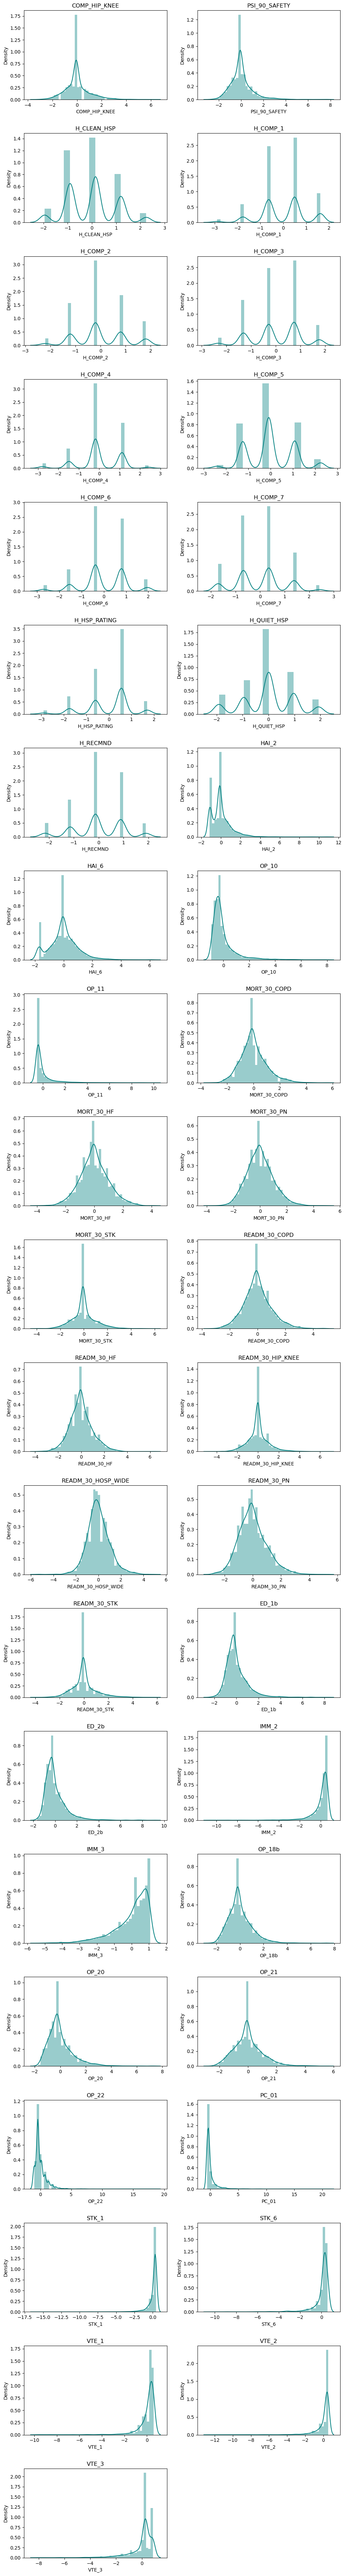

In [169]:
# Plotting distplot for each measure ID.

count=1
fig = plt.figure(figsize=(10,75),dpi=100)

for i in measure_cols:
    plt.subplot(21,2,count) # Used subplot(21,2) as total graphs would be 41
    sns.distplot(final_data[i], color="teal")
    count+=1
    plt.title(i)
    plt.tight_layout(pad=0.5, w_pad=2.0, h_pad=2.5)
plt.show()

**INFERENCE: In the above outputs, we can see that many measure ID column data is skewed and there seem to be many outliers present. We need to treat these and try to reduce the skewness.**
<br></br>
<br></br>

## Outlier Identification and Treatment

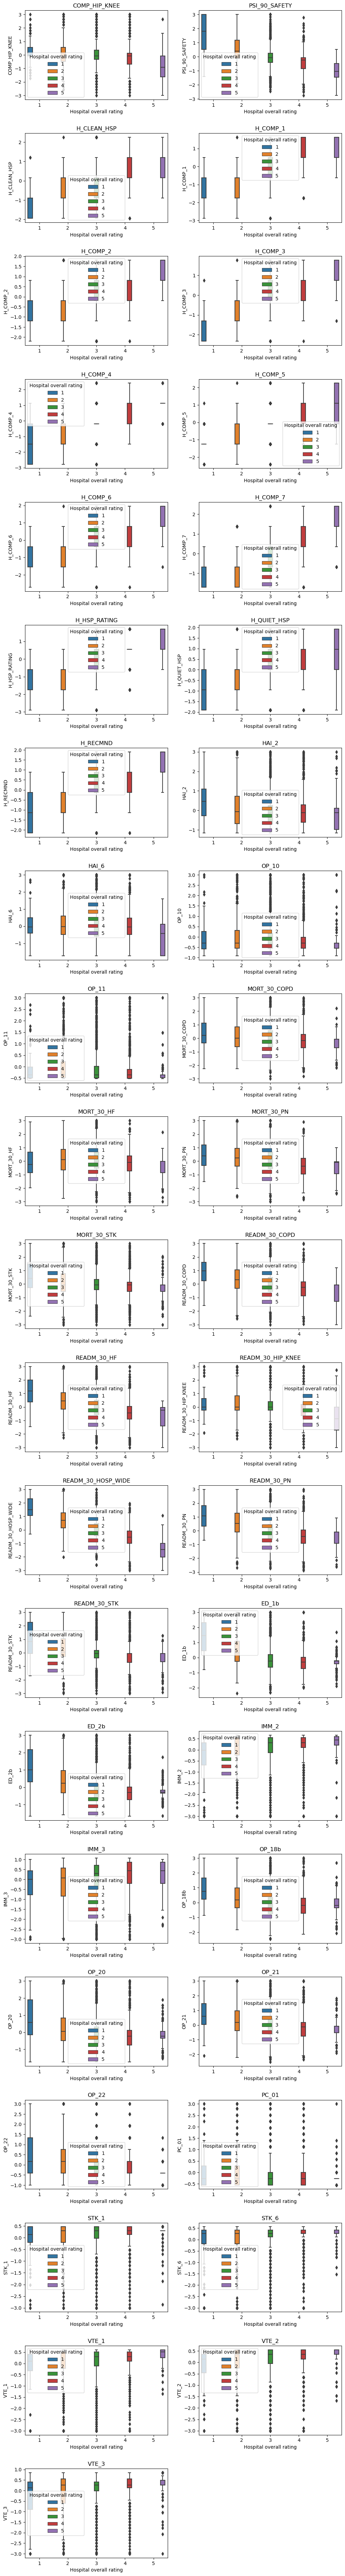

In [170]:
# We will do the flooring (i.e, Z-score = -3) for the lower values and capping (i.e., Z-score = 3) for the higher values.
# If a Z-score is below -3 then it will be set to -3 and if it is above 3 it will be set to 3. This is winsorization.

# Plotting boxplot for each measure ID.
count=1
fig = plt.figure(figsize=(10,75),dpi=100)

for i in measure_cols:
    lower=-3 # i.e. Z-score=-3
    upper=3 # i.e. Z-score=3
    
    # We will treat the outliers
    final_data[i] = np.where(final_data[i] < lower, lower, final_data[i])
    final_data[i] = np.where(final_data[i] > upper, upper, final_data[i])
    
    # Plot box-plots after outliers treatment
    plt.subplot(21,2,count) # Used subplot(21,2) as total graphs would be 41
    sns.boxplot(data=final_data, y=final_data[i], x='Hospital overall rating', hue='Hospital overall rating')
    count+=1
    plt.title(i)
    plt.tight_layout(pad=0.5, w_pad=2.0, h_pad=2.5)
plt.show()

In [171]:
# Let's check the skewness again
final_data.skew().sort_values(ascending = False)

PC_01                      2.484906
OP_11                      2.445913
OP_10                      2.033009
OP_22                      1.521932
ED_2b                      1.385817
OP_20                      1.141642
ED_1b                      1.137196
HAI_2                      1.055096
PSI_90_SAFETY              0.846361
OP_18b                     0.748389
READM_30_STK               0.572025
COMP_HIP_KNEE              0.541057
OP_21                      0.535221
MORT_30_COPD               0.512080
HAI_6                      0.414078
READM_30_PN                0.411051
MORT_30_STK                0.349353
READM_30_COPD              0.314179
READM_30_HIP_KNEE          0.309939
READM_30_HOSP_WIDE         0.306157
MORT_30_PN                 0.291907
READM_30_HF                0.284153
H_COMP_5                   0.158523
H_CLEAN_HSP                0.157259
MORT_30_HF                 0.151733
Provider ID                0.147123
H_COMP_7                   0.130795
H_COMP_2                   0

**INFERENCE: The skewness has decreased.**
<br></br>

## Exploratory Data Analysis

### Univariate Analysis

In [172]:
# Created a function (uni_analysis) to plot countplot for some columns.
def uni_analysis(y,data):
    plt.figure(figsize=(5,2),dpi=100)
    sns.countplot(y=y, data=data)
    plt.title(y)
    plt.show()

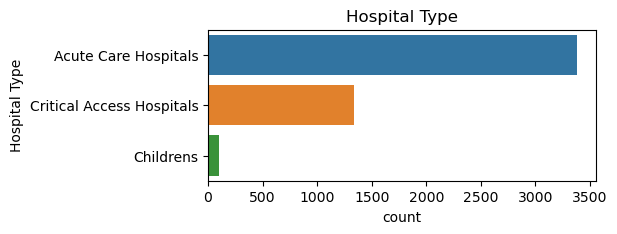

In [173]:
uni_analysis('Hospital Type',df_hgi) # df_hgi has data with Hospital overall rating 'Not Available'

In [174]:
# Checking the value_counts on 'Hospital Type'
print(df_hgi['Hospital Type'].value_counts())

Acute Care Hospitals         3382
Critical Access Hospitals    1337
Childrens                      99
Name: Hospital Type, dtype: int64


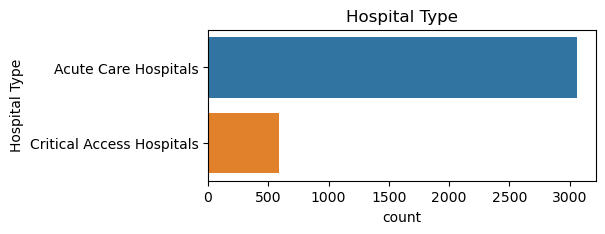

In [175]:
uni_analysis('Hospital Type',final_data)

In [176]:
# Checking the value_counts on 'Hospital Type'
print(final_data['Hospital Type'].value_counts())

Acute Care Hospitals         3061
Critical Access Hospitals     587
Name: Hospital Type, dtype: int64


**INFERENCES:**
* **Hospital overall rating is not available for all the Childrens hospital type.**
* **Most of the hospitals are acute care hospitals which have Hospital overall rating available.**
<br></br>

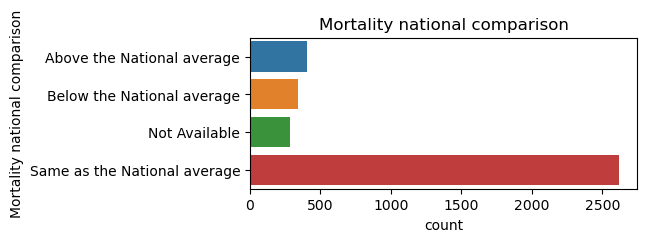

In [177]:
uni_analysis('Mortality national comparison',final_data)

In [178]:
# Checking the value_counts on 'Mortality national comparison'
print(final_data['Mortality national comparison'].value_counts())

Same as the National average    2618
Above the National average       402
Below the National average       343
Not Available                    285
Name: Mortality national comparison, dtype: int64


**INFERENCES:**
* **Mortality is 'Same as the National average' for most of the hospitals when compared at national level.**
* **Around 400 hospitals are 'Above the National average' in mortality.**
* **Mortality rate or death rate is 'Below the National average' for only 343 hospitals.**
<br></br>

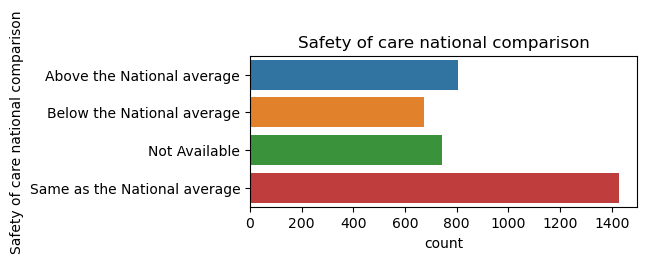

In [179]:
uni_analysis('Safety of care national comparison',final_data)

In [180]:
print(final_data['Safety of care national comparison'].value_counts())

Same as the National average    1428
Above the National average       804
Not Available                    743
Below the National average       673
Name: Safety of care national comparison, dtype: int64


**INFERENCES:**
* **Most of the hospitals have 'Same as the National average' rating in terms of safety of care.**
* **Though there are a considerable number of hospitals for which Safety of care national level rating is not available, still least number of hospitals (i.e. 673) have Below the National average rating.**
<br></br>

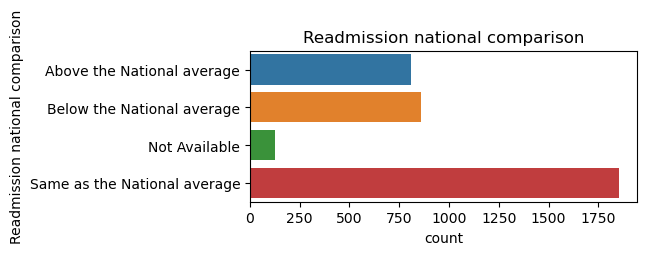

In [181]:
uni_analysis('Readmission national comparison',final_data)

In [182]:
print(final_data['Readmission national comparison'].value_counts())

Same as the National average    1853
Below the National average       860
Above the National average       811
Not Available                    124
Name: Readmission national comparison, dtype: int64


**INFERENCES:**
* **Readmission is 'Same as the National average' for most of the hospitals when compared at national level.**
* **Around 811 hospitals are 'Above the National average' in readmission.**
* **Readmission rate is 'Below the National average' for only 860 hospitals.**
<br></br>

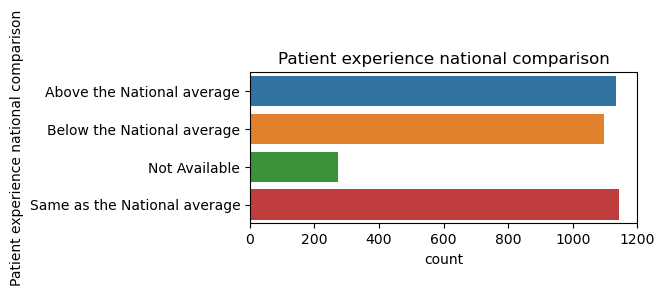

In [183]:
uni_analysis('Patient experience national comparison',final_data)

In [184]:
print(final_data['Patient experience national comparison'].value_counts())

Same as the National average    1143
Above the National average      1135
Below the National average      1097
Not Available                    273
Name: Patient experience national comparison, dtype: int64


**INFERENCE: Except the hospitals for which rating not available, other hospitals are almost uniformly divided into Same, Above and Below the National average rating groups for Patient experience.**
<br></br>

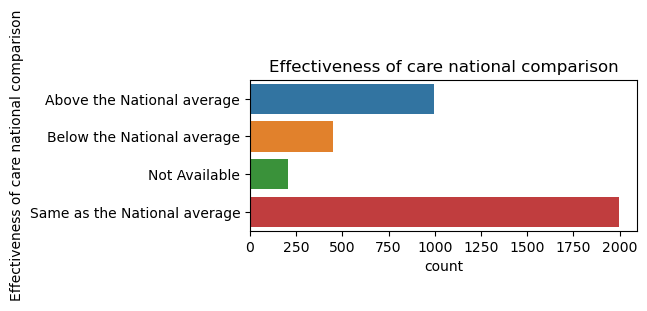

In [185]:
uni_analysis('Effectiveness of care national comparison',final_data)

In [186]:
print(final_data['Effectiveness of care national comparison'].value_counts())

Same as the National average    1997
Above the National average       997
Below the National average       449
Not Available                    205
Name: Effectiveness of care national comparison, dtype: int64


**INFERENCE: Effectiveness of care national comparison rating is 'Same as the National average' for most of the hospitals followed by 'Above the National average' rating.**
<br></br>

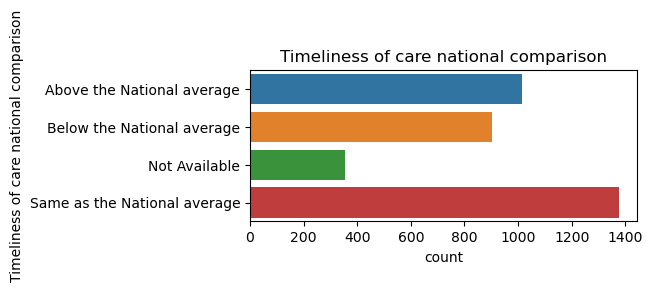

In [187]:
uni_analysis('Timeliness of care national comparison',final_data)

In [188]:
print(final_data['Timeliness of care national comparison'].value_counts())

Same as the National average    1376
Above the National average      1014
Below the National average       903
Not Available                    355
Name: Timeliness of care national comparison, dtype: int64


**INFERENCE: Timely care national comparison rating is 'Same as the National average' for most of the hospitals followed by 'Above the National average' rating.**
<br></br>

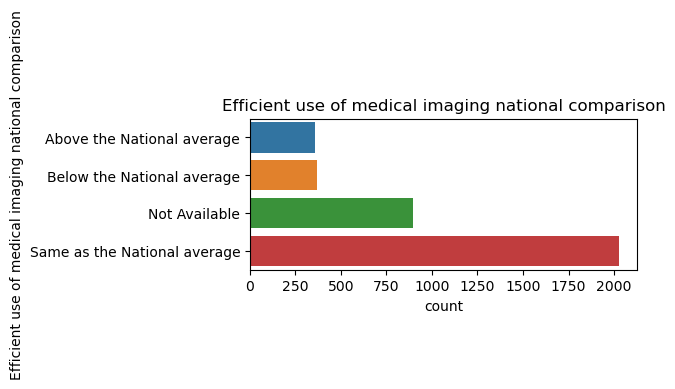

In [189]:
uni_analysis('Efficient use of medical imaging national comparison',final_data)

In [190]:
print(final_data['Efficient use of medical imaging national comparison'].value_counts())

Same as the National average    2027
Not Available                    894
Below the National average       368
Above the National average       359
Name: Efficient use of medical imaging national comparison, dtype: int64


**INFERENCES:**
* **Most of the hospitals have 'Same as the National average' rating in terms of efficient use of medical imaging.**
* **Though there are a considerable number of hospitals for which Efficient use of medical imaging national level rating is not available, still few number of hospitals have Above and Below the National average rating.**
<br></br>

### Bivariate Analysis

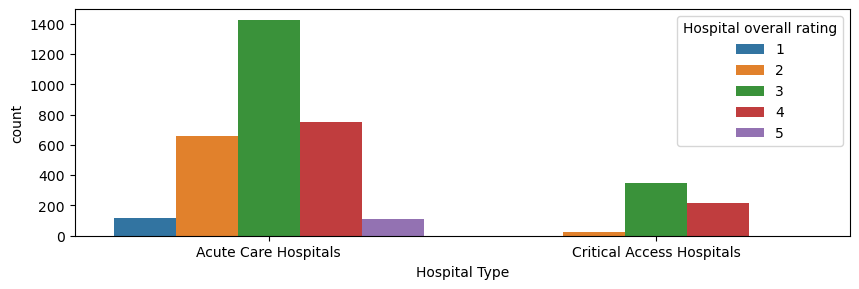

In [191]:
# Plotting a countplot for the categorical column - Hospital Type with "Hospital overall rating".
plt.figure(figsize=(10,3),dpi=100)
sns.countplot(x='Hospital Type', hue='Hospital overall rating', data=final_data)
plt.show()

**INFERENCES:**
* **Most of the Acute Care and Critical Access Hospitals have Hospital overall rating as 3.**
* **Very few hospitals have 1(i.e. lowest) or 5(i.e. highest) Hospital overall rating.**
<br></br>

In [192]:
# Created a function (bi_analysis) to plot barplot for some columns.
def bi_analysis(y,data):
    plt.figure(figsize=(5,2),dpi=100)
    
    #data.groupby([y])['Hospital overall rating'].mean().plot.bar()
    #sns.boxplot(data['Hospital overall rating'], data[y])
    sns.barplot(x='Hospital overall rating', y=y, data=data, 
                order = ['Above the National average', 'Same as the National average', 
                         'Below the National average', 'Not Available'])
    plt.title(y)
    plt.show()

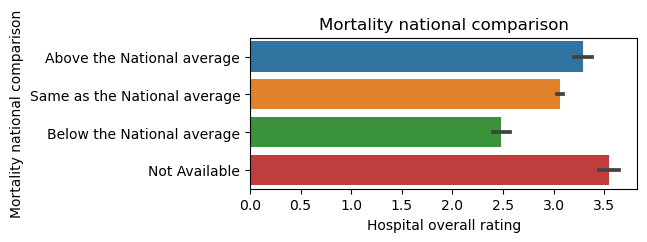

In [193]:
bi_analysis('Mortality national comparison',final_data)

**INFERENCES:**
* **Hospitals for which Mortality national comparison rating is not available have above 3.5 average overall rating**
* **Average overall rating is above 3 for hospitals with Above or Same as the National average**
<br></br>

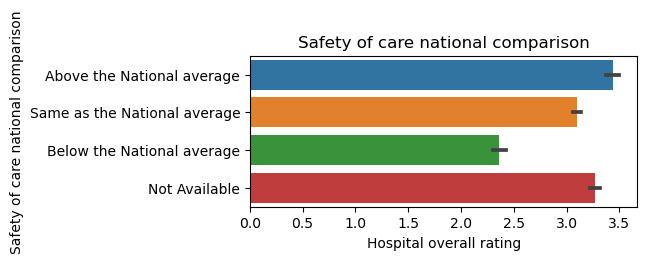

In [194]:
bi_analysis('Safety of care national comparison',final_data)

**INFERENCES:**
* **Hospitals for which safety of care national comparison rating is Above or Same as the National average or not available have above 3 average overall rating**
* **Average overall rating is less than 2.5 for hospitals with Below the National average safety of care.**
<br></br>

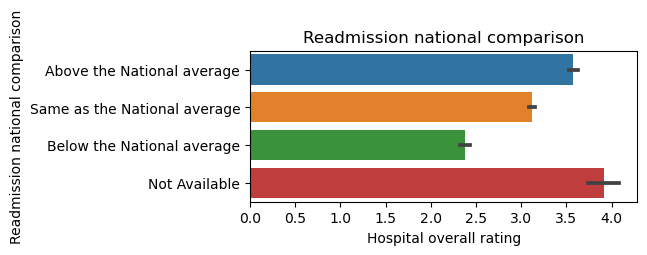

In [195]:
bi_analysis('Readmission national comparison',final_data)

**INFERENCES:**
* **Below the National average Readmission rating hospitals have average hospital overall rating as around 2.5**
* **Other National average Readmission rating hospitals have average hospital overall rating above 3**
<br></br>

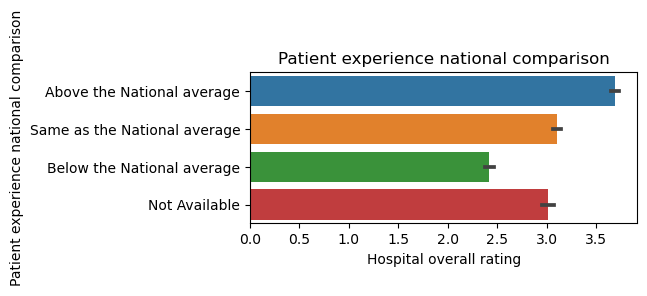

In [196]:
bi_analysis('Patient experience national comparison',final_data)

**INFERENCES:**
* **Hospitals with 'Above the National average' patient experience have the highest average hospital overall rating**
* **Hospitals with 'Below the National average' patient experience have the lowest average hospital overall rating**
<br></br>

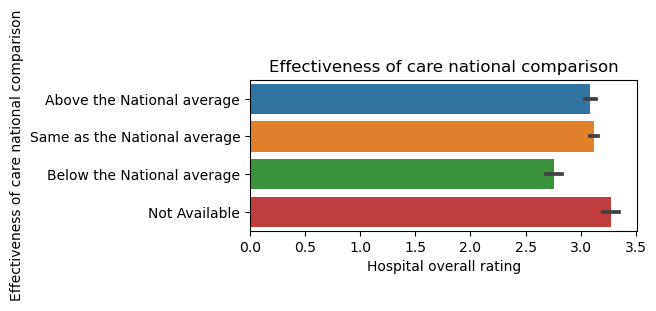

In [197]:
bi_analysis('Effectiveness of care national comparison',final_data)

**INFERENCES:**
* **Below the National average effectiveness of care rating hospitals have average hospital overall rating a little above 2.5**
* **Other National average effectiveness of care rating hospitals have average hospital overall rating above 3**
<br></br>

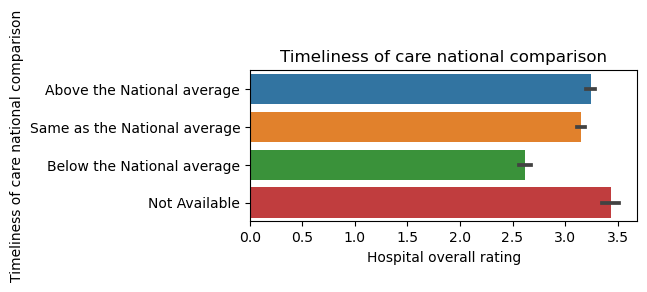

In [198]:
bi_analysis('Timeliness of care national comparison',final_data)

**INFERENCES:**
* **Below the National average timeliness of care rating hospitals have average hospital overall rating a little above 2.5**
* **Other National average timeliness of care rating hospitals have average hospital overall rating above 3**
<br></br>

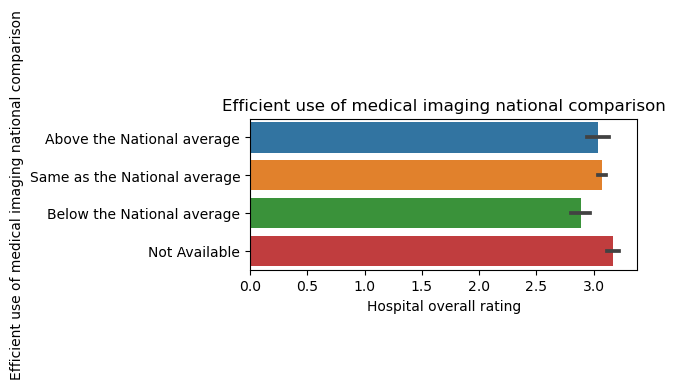

In [199]:
bi_analysis('Efficient use of medical imaging national comparison',final_data)

**INFERENCES:**
* **Below the National average efficient use of medical imaging rating hospitals have average hospital overall rating a little below 3**
* **Above the National average efficient use of medical imaging rating hospitals have average hospital overall rating as 3**
* **Same as the National average efficient use of medical imaging rating hospitals have average hospital overall rating a little above 3**
<br></br>

### Multivariate Analysis

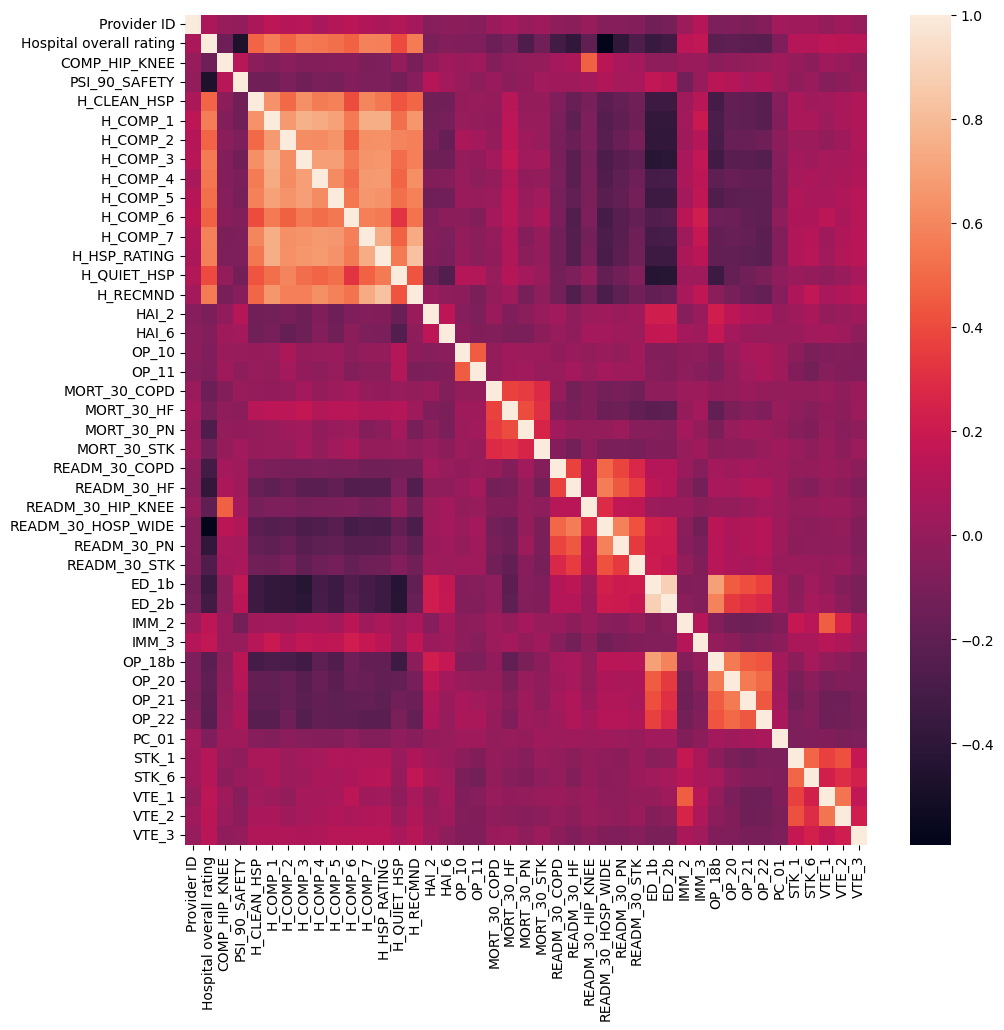

In [200]:
# Correlation Matrix for Numerical variables
plt.figure(figsize=(11,11),dpi=100)
sns.heatmap(final_data.corr())
plt.show()

In [201]:
correlation_1 = final_data.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]

In [202]:
# See 20 high correlations
correlation_1.tail(20)

ED_1b         OP_18b          0.694117
OP_18b        ED_1b           0.694117
H_COMP_1      H_COMP_5        0.697567
H_COMP_5      H_COMP_1        0.697567
H_COMP_1      H_COMP_4        0.732350
H_COMP_4      H_COMP_1        0.732350
H_COMP_7      H_RECMND        0.735559
H_RECMND      H_COMP_7        0.735559
H_COMP_7      H_HSP_RATING    0.738921
H_HSP_RATING  H_COMP_7        0.738921
H_COMP_1      H_COMP_7        0.745557
H_COMP_7      H_COMP_1        0.745557
H_COMP_1      H_HSP_RATING    0.746209
H_HSP_RATING  H_COMP_1        0.746209
H_COMP_3      H_COMP_1        0.757152
H_COMP_1      H_COMP_3        0.757152
H_HSP_RATING  H_RECMND        0.826249
H_RECMND      H_HSP_RATING    0.826249
ED_1b         ED_2b           0.885265
ED_2b         ED_1b           0.885265
dtype: float64

**INFERENCES:**
* **ED_1b and ED_2b are highly correlated to each other**
* **H_HSP_RATING and H_RECMND have correlation of about 0.826**
* **Most of the H_COMP_ as well as H_RECMND and H_HSP_RATING are correlated.**
<br></br>

## Class Imbalance

In [203]:
# Checking the percentage of each 'Hospital overall rating'
imbalance=final_data['Hospital overall rating'].value_counts(normalize=True)*100
imbalance

3    48.574561
4    26.425439
2    18.750000
1     3.207237
5     3.042763
Name: Hospital overall rating, dtype: float64

**INFERENCE: There is a high class imbalance.**
<br></br>
<br></br>

In [204]:
dataset = final_data.drop(['Provider ID', 'Hospital Name', 'Hospital Type',
                           'Mortality national comparison','Safety of care national comparison',
              'Readmission national comparison','Patient experience national comparison',
              'Effectiveness of care national comparison','Timeliness of care national comparison',
              'Efficient use of medical imaging national comparison'], axis=1)
dataset.head()

,Hospital overall rating,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
0,3,1.601180,-1.280237,-0.900325,-0.632267,-0.201327,-1.308775,-0.180509,-0.077780,-0.373408,0.353265,0.551288,0.966931,0.885878,3.000000,-0.070615,-0.230028,-0.358524,1.115145,0.184907,-0.415542,0.354666,0.888351,-0.370572,1.039645,-0.203437,1.064973,0.167922,-0.114010,-0.561488,0.322402,-0.272949,1.323162,2.562944,2.795184,1.336484,-0.54700,0.300724,0.412021,0.300006,0.348738,-0.459235
1,3,-0.066456,-0.234236,-0.900325,-0.632267,0.800637,-0.284223,-0.180509,-0.077780,0.792852,-0.675235,0.551288,0.966931,-0.127189,0.219592,-0.875691,0.508851,1.382340,-0.439430,2.350251,2.097284,0.424860,-1.592861,-0.032999,2.306811,-0.772560,-0.500827,0.939710,-0.397438,-0.512674,0.547778,-0.131119,-0.729509,0.046918,0.412947,0.171770,-0.26912,0.134807,-1.224158,0.092945,-0.663191,0.854260
2,2,1.601180,0.134942,-0.900325,-0.632267,0.800637,-0.284223,-0.180509,-0.077780,-1.539667,-0.675235,-1.744485,0.966931,-1.140256,0.563615,-0.648078,0.348225,0.334078,-0.896658,2.420100,0.864577,2.109524,-0.152158,-0.910689,0.828451,-0.203437,0.520347,-0.603866,-0.680867,-0.398776,0.660466,0.152541,-0.313778,-1.078673,0.290781,-0.410587,-0.54700,0.300724,0.114534,0.403537,-1.675121,-1.188955
3,3,-0.066456,-0.603413,0.147660,-0.632267,1.802600,0.740328,1.118301,1.085093,-0.373408,0.353265,-0.596599,1.925193,-0.127189,-1.158889,-1.729239,1.686772,0.614863,1.115145,1.581903,1.149048,1.196998,-0.072119,-0.573116,-0.016326,1.162460,0.111877,0.167922,-0.659064,-0.561488,0.547778,-2.258566,-0.677543,0.775241,2.245437,-0.410587,-0.26912,-2.851695,-3.000000,0.300006,0.348738,0.270484
4,3,-0.066456,0.073412,0.147660,0.495059,-0.201327,-0.284223,-0.180509,-0.077780,-0.373408,0.353265,0.551288,0.008668,-0.127189,-0.125625,-0.496336,-0.529862,-0.358524,0.109243,0.394456,-0.320719,-0.066500,-0.632392,0.777177,-0.016326,0.138037,-0.773140,-0.052589,-1.084207,-0.756741,0.097027,-2.967715,-1.223190,0.046918,-0.258967,-0.410587,-0.26912,0.300724,0.263278,0.507068,0.348738,0.270484


In [205]:
# Put feature variables into X
X = dataset.drop(['Hospital overall rating'], axis=1)
X.head()

,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
0,1.601180,-1.280237,-0.900325,-0.632267,-0.201327,-1.308775,-0.180509,-0.077780,-0.373408,0.353265,0.551288,0.966931,0.885878,3.000000,-0.070615,-0.230028,-0.358524,1.115145,0.184907,-0.415542,0.354666,0.888351,-0.370572,1.039645,-0.203437,1.064973,0.167922,-0.114010,-0.561488,0.322402,-0.272949,1.323162,2.562944,2.795184,1.336484,-0.54700,0.300724,0.412021,0.300006,0.348738,-0.459235
1,-0.066456,-0.234236,-0.900325,-0.632267,0.800637,-0.284223,-0.180509,-0.077780,0.792852,-0.675235,0.551288,0.966931,-0.127189,0.219592,-0.875691,0.508851,1.382340,-0.439430,2.350251,2.097284,0.424860,-1.592861,-0.032999,2.306811,-0.772560,-0.500827,0.939710,-0.397438,-0.512674,0.547778,-0.131119,-0.729509,0.046918,0.412947,0.171770,-0.26912,0.134807,-1.224158,0.092945,-0.663191,0.854260
2,1.601180,0.134942,-0.900325,-0.632267,0.800637,-0.284223,-0.180509,-0.077780,-1.539667,-0.675235,-1.744485,0.966931,-1.140256,0.563615,-0.648078,0.348225,0.334078,-0.896658,2.420100,0.864577,2.109524,-0.152158,-0.910689,0.828451,-0.203437,0.520347,-0.603866,-0.680867,-0.398776,0.660466,0.152541,-0.313778,-1.078673,0.290781,-0.410587,-0.54700,0.300724,0.114534,0.403537,-1.675121,-1.188955
3,-0.066456,-0.603413,0.147660,-0.632267,1.802600,0.740328,1.118301,1.085093,-0.373408,0.353265,-0.596599,1.925193,-0.127189,-1.158889,-1.729239,1.686772,0.614863,1.115145,1.581903,1.149048,1.196998,-0.072119,-0.573116,-0.016326,1.162460,0.111877,0.167922,-0.659064,-0.561488,0.547778,-2.258566,-0.677543,0.775241,2.245437,-0.410587,-0.26912,-2.851695,-3.000000,0.300006,0.348738,0.270484
4,-0.066456,0.073412,0.147660,0.495059,-0.201327,-0.284223,-0.180509,-0.077780,-0.373408,0.353265,0.551288,0.008668,-0.127189,-0.125625,-0.496336,-0.529862,-0.358524,0.109243,0.394456,-0.320719,-0.066500,-0.632392,0.777177,-0.016326,0.138037,-0.773140,-0.052589,-1.084207,-0.756741,0.097027,-2.967715,-1.223190,0.046918,-0.258967,-0.410587,-0.26912,0.300724,0.263278,0.507068,0.348738,0.270484


In [206]:
# Put target variable in y
y = dataset['Hospital overall rating']
y.head()

0    3
1    3
2    2
3    3
4    3
Name: Hospital overall rating, dtype: int32

## Train-Test Split
**Split the dataset into training and testing sets.**

### Stratified KFold Cross Validation 
* **This validation method works perfectly well for imbalanced data having multiple classes. Each fold in stratified cross-validation will have a representation of data of all classes in the same ratio as in the whole dataset.**
* **Let's take n_splits=10. Thus there would be 10 folds with around 364 or 365 data rows each time as final dataset has 3648 rows.**
* **Have mentioned random_state so as to replicate the same results everytime.**

In [207]:
# Import required library
from sklearn.model_selection import StratifiedKFold # For Train-Test Split

In [208]:
# Create an instance of StratifiedKFold to get indices of different training and test folds.
sKFold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

## Model Building
* **Let's first try and see the performance of various classifiers with their default parameter values on the available data.**
* **Have mentioned random_state wherever necessary so as to replicate the same results everytime.**
* **Starting with Logistic Regression first has this is a classification problem.**

### Logistic Regression

In [209]:
# Import the required library
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # For Feature Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [210]:
# Create an instance of Pipeline
# As it is a multiclass case, mentioning multi_class='ovr' so that the training algorithm uses the one-vs-rest (OvR) scheme.
pipeline = make_pipeline(StandardScaler(), LogisticRegression(multi_class='ovr'))

In [211]:
# To store the respective scores of every fold
accuracy_scores = [] 
precision_scores = []
recall_scores = []
f1_scores = []

In [212]:
# Built a function train_model to pass the data splits for training and testing.
def train_model(train_index, test_index, fold_no):
    X_train = train_index.drop(['Hospital overall rating'],axis=1)
    y_train = train_index['Hospital overall rating']
    X_test = test_index.drop(['Hospital overall rating'],axis=1)
    y_test = test_index['Hospital overall rating']
    model=pipeline.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('\nFor Fold',fold_no, 'Accuracy is',accuracy_score(y_test, prediction))
    
    # Calculating Evaluation Metrics Scores
    ac=accuracy_score(y_test, prediction)
    accuracy_scores.append(ac)
    
    # Weighted Average takes class imbalance into account.
    pre = precision_score(y_test, prediction, average='weighted')
    precision_scores.append(pre)
    
    rec = recall_score(y_test, prediction, average='weighted')
    recall_scores.append(rec)
    
    f1 = f1_score(y_test, prediction, average='weighted')
    f1_scores.append(f1)
    
    # Creating  a confusion matrix to compares the y_test and y_pred
    con_mat = confusion_matrix(y_test, prediction)
    
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    df_con_mat = pd.DataFrame(con_mat, index = [1,2,3,4,5], columns = [1,2,3,4,5])
    
    #Plotting the confusion matrix
    plt.figure(figsize=(5,3),dpi=100)
    sns.heatmap(df_con_mat, cmap = "Blues_r", annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
    # Print Classification Report
    report = classification_report(y_test, prediction)
    print('\nClassification Report:\n')
    print(report)



For Fold 1 Accuracy is 0.7671232876712328


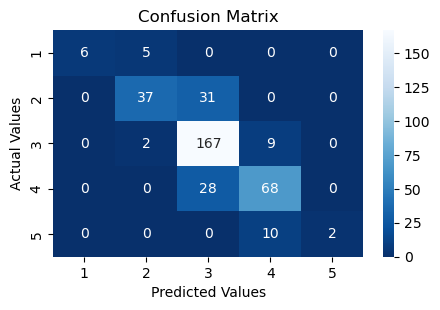


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.55      0.71        11
           2       0.84      0.54      0.66        68
           3       0.74      0.94      0.83       178
           4       0.78      0.71      0.74        96
           5       1.00      0.17      0.29        12

    accuracy                           0.77       365
   macro avg       0.87      0.58      0.64       365
weighted avg       0.79      0.77      0.75       365


For Fold 2 Accuracy is 0.8273972602739726


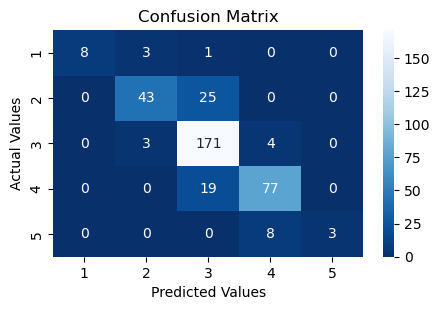


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.67      0.80        12
           2       0.88      0.63      0.74        68
           3       0.79      0.96      0.87       178
           4       0.87      0.80      0.83        96
           5       1.00      0.27      0.43        11

    accuracy                           0.83       365
   macro avg       0.91      0.67      0.73       365
weighted avg       0.84      0.83      0.82       365


For Fold 3 Accuracy is 0.7972602739726027


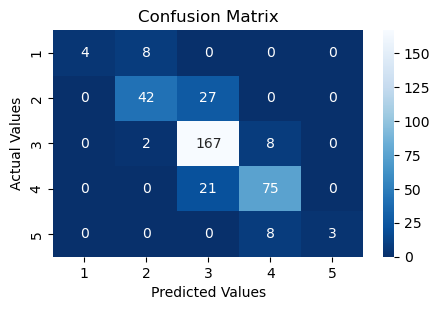


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.33      0.50        12
           2       0.81      0.61      0.69        69
           3       0.78      0.94      0.85       177
           4       0.82      0.78      0.80        96
           5       1.00      0.27      0.43        11

    accuracy                           0.80       365
   macro avg       0.88      0.59      0.66       365
weighted avg       0.81      0.80      0.78       365


For Fold 4 Accuracy is 0.7917808219178082


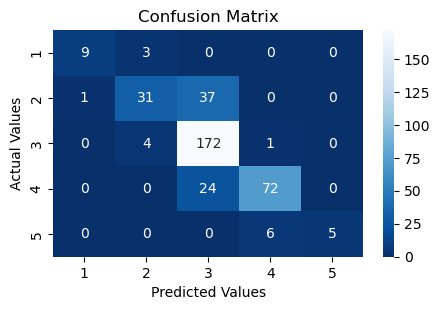


Classification Report:

              precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           2       0.82      0.45      0.58        69
           3       0.74      0.97      0.84       177
           4       0.91      0.75      0.82        96
           5       1.00      0.45      0.62        11

    accuracy                           0.79       365
   macro avg       0.87      0.68      0.74       365
weighted avg       0.81      0.79      0.78       365


For Fold 5 Accuracy is 0.8027397260273973


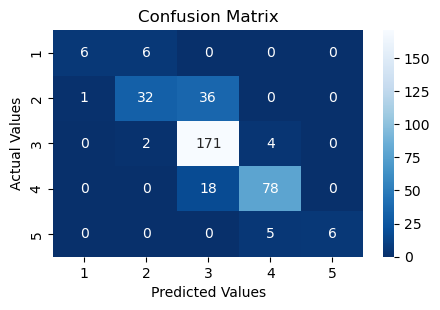


Classification Report:

              precision    recall  f1-score   support

           1       0.86      0.50      0.63        12
           2       0.80      0.46      0.59        69
           3       0.76      0.97      0.85       177
           4       0.90      0.81      0.85        96
           5       1.00      0.55      0.71        11

    accuracy                           0.80       365
   macro avg       0.86      0.66      0.73       365
weighted avg       0.81      0.80      0.79       365


For Fold 6 Accuracy is 0.7808219178082192


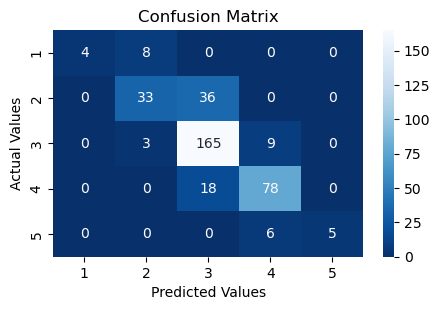


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.33      0.50        12
           2       0.75      0.48      0.58        69
           3       0.75      0.93      0.83       177
           4       0.84      0.81      0.83        96
           5       1.00      0.45      0.62        11

    accuracy                           0.78       365
   macro avg       0.87      0.60      0.67       365
weighted avg       0.79      0.78      0.77       365


For Fold 7 Accuracy is 0.7698630136986301


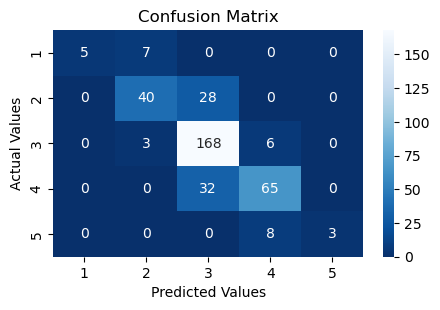


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.42      0.59        12
           2       0.80      0.59      0.68        68
           3       0.74      0.95      0.83       177
           4       0.82      0.67      0.74        97
           5       1.00      0.27      0.43        11

    accuracy                           0.77       365
   macro avg       0.87      0.58      0.65       365
weighted avg       0.79      0.77      0.76       365


For Fold 8 Accuracy is 0.7726027397260274


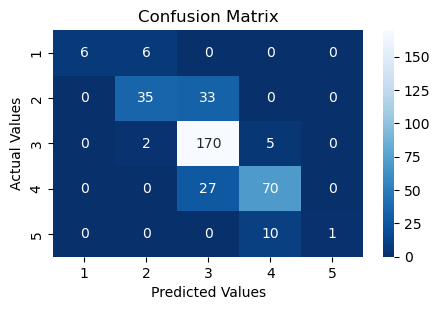


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.50      0.67        12
           2       0.81      0.51      0.63        68
           3       0.74      0.96      0.84       177
           4       0.82      0.72      0.77        97
           5       1.00      0.09      0.17        11

    accuracy                           0.77       365
   macro avg       0.88      0.56      0.61       365
weighted avg       0.79      0.77      0.75       365


For Fold 9 Accuracy is 0.8021978021978022


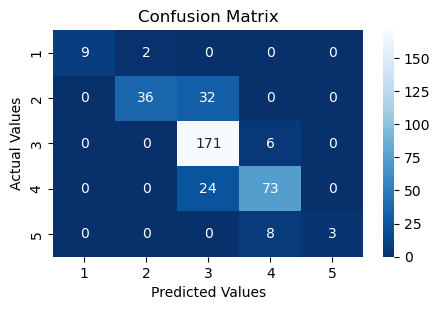


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.95      0.53      0.68        68
           3       0.75      0.97      0.85       177
           4       0.84      0.75      0.79        97
           5       1.00      0.27      0.43        11

    accuracy                           0.80       364
   macro avg       0.91      0.67      0.73       364
weighted avg       0.83      0.80      0.79       364


For Fold 10 Accuracy is 0.8214285714285714


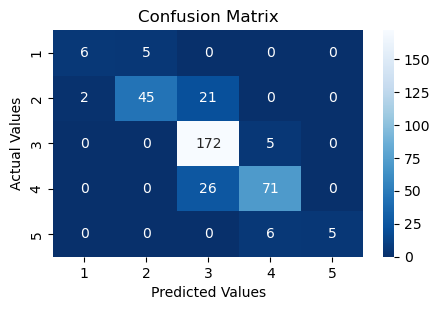


Classification Report:

              precision    recall  f1-score   support

           1       0.75      0.55      0.63        11
           2       0.90      0.66      0.76        68
           3       0.79      0.97      0.87       177
           4       0.87      0.73      0.79        97
           5       1.00      0.45      0.62        11

    accuracy                           0.82       364
   macro avg       0.86      0.67      0.74       364
weighted avg       0.83      0.82      0.81       364


Average Cross-Validation Accuracy: 0.7933

Average Cross-Validation Precision: 0.8092

Average Cross-Validation Recall: 0.7933

Average Cross-Validation F1-Score: 0.7806


In [213]:
# Created a for loop to call the 'train_model' function for each split.
fold_no=1
for train,test in sKFold.split(dataset,y):
    train_index = dataset.iloc[train,:]
    test_index = dataset.iloc[test,:]
    train_model(train_index, test_index, fold_no)
    fold_no += 1

# Calculate mean scores
mean_ac = round(np.mean(accuracy_scores), 4)
mean_pre = round(np.mean(precision_scores), 4)
mean_rec = round(np.mean(recall_scores), 4)
mean_f1 = round(np.mean(f1_scores), 4)

print('\nAverage Cross-Validation Accuracy:', mean_ac)
print('\nAverage Cross-Validation Precision:', mean_pre)
print('\nAverage Cross-Validation Recall:', mean_rec)
print('\nAverage Cross-Validation F1-Score:', mean_f1)


### Logistic Regression Performance Metrics

In [214]:
# New 'compare' dataframe to store the following scores of different models for comparing them later,
# Average Cross-Validation Accuracy (from all 10 folds)
# Weighted Average Precision (from all 10 folds)
# Weighted Average Recall (from all 10 folds)
# Weighted Average F1-Score (from all 10 folds)
# Final Model will be the one with Hyperparameter Tuning
compare = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision (Weighted Avg)', 'Recall (Weighted Avg)', 'F1-Score (Weighted Avg)'])
compare['Model'] = ['Logistic Regression (with OVR)', 'Random Forest', 'Decision Tree', 'Linear Support Vector Classification', 'Final Model']
compare.iat[0,1] = mean_ac
compare.iat[0,2] = mean_pre
compare.iat[0,3] = mean_rec
compare.iat[0,4] = mean_f1
compare

,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,Logistic Regression (with OVR),0.7933,0.8092,0.7933,0.7806
1,Random Forest,NaN,NaN,NaN,NaN
2,Decision Tree,NaN,NaN,NaN,NaN
3,Linear Support Vector Classification,NaN,NaN,NaN,NaN
4,Final Model,NaN,NaN,NaN,NaN


## Random Forest Model

In [215]:
# Import the required library
from sklearn.ensemble import RandomForestClassifier

In [216]:
# Create an instance of Pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 100, random_state = 1))

In [217]:
# To store the respective scores of every fold
accuracy_scores = [] 
precision_scores = []
recall_scores = []
f1_scores = []


For Fold 1 Accuracy is 0.8027397260273973


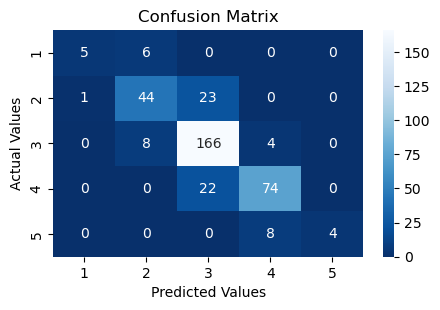


Classification Report:

              precision    recall  f1-score   support

           1       0.83      0.45      0.59        11
           2       0.76      0.65      0.70        68
           3       0.79      0.93      0.85       178
           4       0.86      0.77      0.81        96
           5       1.00      0.33      0.50        12

    accuracy                           0.80       365
   macro avg       0.85      0.63      0.69       365
weighted avg       0.81      0.80      0.79       365


For Fold 2 Accuracy is 0.8191780821917808


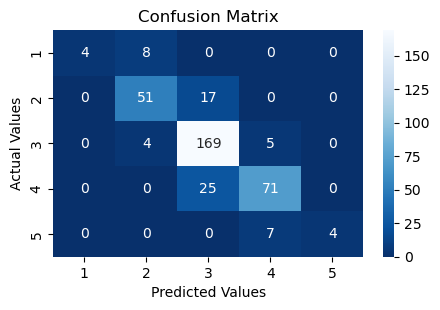


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.33      0.50        12
           2       0.81      0.75      0.78        68
           3       0.80      0.95      0.87       178
           4       0.86      0.74      0.79        96
           5       1.00      0.36      0.53        11

    accuracy                           0.82       365
   macro avg       0.89      0.63      0.69       365
weighted avg       0.83      0.82      0.81       365


For Fold 3 Accuracy is 0.7835616438356164


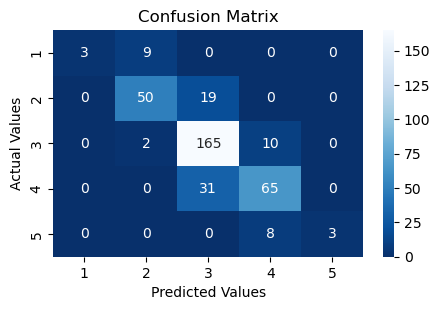


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.25      0.40        12
           2       0.82      0.72      0.77        69
           3       0.77      0.93      0.84       177
           4       0.78      0.68      0.73        96
           5       1.00      0.27      0.43        11

    accuracy                           0.78       365
   macro avg       0.87      0.57      0.63       365
weighted avg       0.80      0.78      0.77       365


For Fold 4 Accuracy is 0.7780821917808219


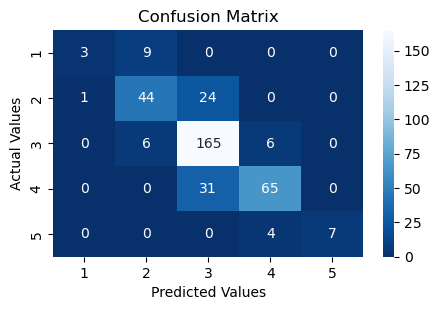


Classification Report:

              precision    recall  f1-score   support

           1       0.75      0.25      0.38        12
           2       0.75      0.64      0.69        69
           3       0.75      0.93      0.83       177
           4       0.87      0.68      0.76        96
           5       1.00      0.64      0.78        11

    accuracy                           0.78       365
   macro avg       0.82      0.63      0.69       365
weighted avg       0.79      0.78      0.77       365


For Fold 5 Accuracy is 0.8054794520547945


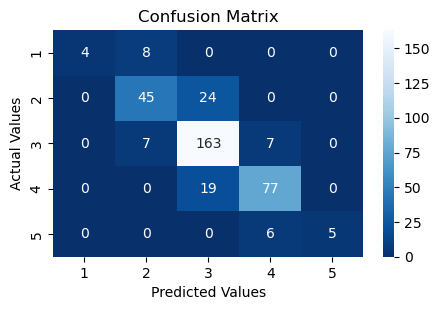


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.33      0.50        12
           2       0.75      0.65      0.70        69
           3       0.79      0.92      0.85       177
           4       0.86      0.80      0.83        96
           5       1.00      0.45      0.62        11

    accuracy                           0.81       365
   macro avg       0.88      0.63      0.70       365
weighted avg       0.81      0.81      0.80       365


For Fold 6 Accuracy is 0.7835616438356164


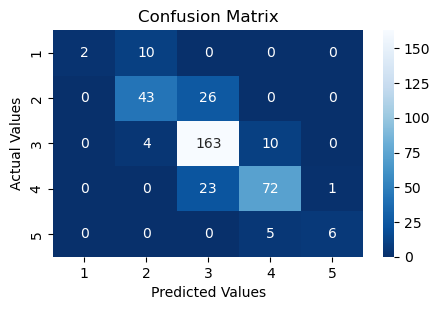


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.17      0.29        12
           2       0.75      0.62      0.68        69
           3       0.77      0.92      0.84       177
           4       0.83      0.75      0.79        96
           5       0.86      0.55      0.67        11

    accuracy                           0.78       365
   macro avg       0.84      0.60      0.65       365
weighted avg       0.79      0.78      0.77       365


For Fold 7 Accuracy is 0.7945205479452054


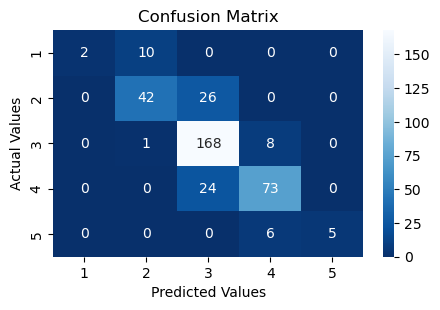


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.17      0.29        12
           2       0.79      0.62      0.69        68
           3       0.77      0.95      0.85       177
           4       0.84      0.75      0.79        97
           5       1.00      0.45      0.62        11

    accuracy                           0.79       365
   macro avg       0.88      0.59      0.65       365
weighted avg       0.81      0.79      0.78       365


For Fold 8 Accuracy is 0.7424657534246575


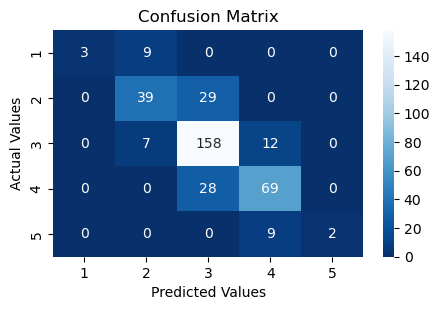


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.25      0.40        12
           2       0.71      0.57      0.63        68
           3       0.73      0.89      0.81       177
           4       0.77      0.71      0.74        97
           5       1.00      0.18      0.31        11

    accuracy                           0.74       365
   macro avg       0.84      0.52      0.58       365
weighted avg       0.76      0.74      0.73       365


For Fold 9 Accuracy is 0.7664835164835165


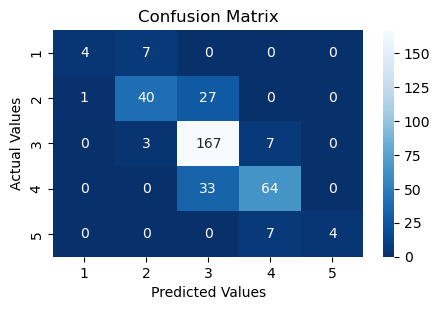


Classification Report:

              precision    recall  f1-score   support

           1       0.80      0.36      0.50        11
           2       0.80      0.59      0.68        68
           3       0.74      0.94      0.83       177
           4       0.82      0.66      0.73        97
           5       1.00      0.36      0.53        11

    accuracy                           0.77       364
   macro avg       0.83      0.58      0.65       364
weighted avg       0.78      0.77      0.75       364


For Fold 10 Accuracy is 0.8159340659340659


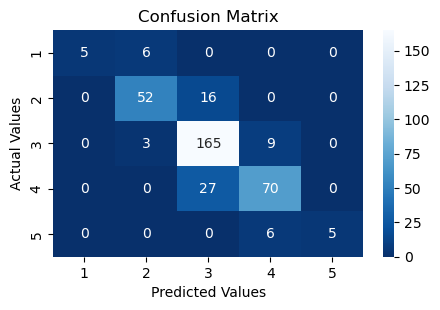


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.45      0.62        11
           2       0.85      0.76      0.81        68
           3       0.79      0.93      0.86       177
           4       0.82      0.72      0.77        97
           5       1.00      0.45      0.62        11

    accuracy                           0.82       364
   macro avg       0.89      0.67      0.74       364
weighted avg       0.82      0.82      0.81       364


Average Cross-Validation Accuracy: 0.7892

Average Cross-Validation Precision: 0.7995

Average Cross-Validation Recall: 0.7892

Average Cross-Validation F1-Score: 0.7787


In [218]:
# Created a for loop to call the 'train_model' function for each split.
fold_no=1
for train,test in sKFold.split(dataset,y):
    train_index = dataset.iloc[train,:]
    test_index = dataset.iloc[test,:]
    train_model(train_index, test_index, fold_no)
    fold_no += 1

# Calculate mean scores
mean_ac = round(np.mean(accuracy_scores), 4)
mean_pre = round(np.mean(precision_scores), 4)
mean_rec = round(np.mean(recall_scores), 4)
mean_f1 = round(np.mean(f1_scores), 4)

print('\nAverage Cross-Validation Accuracy:', mean_ac)
print('\nAverage Cross-Validation Precision:', mean_pre)
print('\nAverage Cross-Validation Recall:', mean_rec)
print('\nAverage Cross-Validation F1-Score:', mean_f1)


### Random Forest Performance Metrics

In [219]:
compare.iat[1,1] = mean_ac
compare.iat[1,2] = mean_pre
compare.iat[1,3] = mean_rec
compare.iat[1,4] = mean_f1
compare

,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,Logistic Regression (with OVR),0.7933,0.8092,0.7933,0.7806
1,Random Forest,0.7892,0.7995,0.7892,0.7787
2,Decision Tree,NaN,NaN,NaN,NaN
3,Linear Support Vector Classification,NaN,NaN,NaN,NaN
4,Final Model,NaN,NaN,NaN,NaN


## Decision Trees

In [220]:
from sklearn.tree import DecisionTreeClassifier

In [221]:
# Create an instance of Pipeline
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='gini', random_state=1))

In [222]:
# To store the respective scores of every fold
accuracy_scores = [] 
precision_scores = []
recall_scores = []
f1_scores = []


For Fold 1 Accuracy is 0.673972602739726


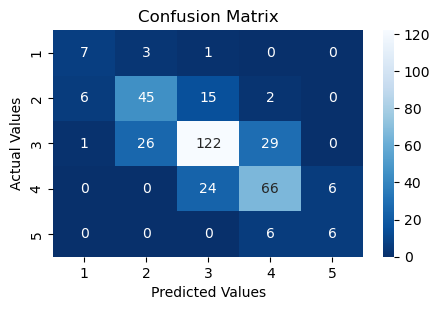


Classification Report:

              precision    recall  f1-score   support

           1       0.50      0.64      0.56        11
           2       0.61      0.66      0.63        68
           3       0.75      0.69      0.72       178
           4       0.64      0.69      0.66        96
           5       0.50      0.50      0.50        12

    accuracy                           0.67       365
   macro avg       0.60      0.63      0.61       365
weighted avg       0.68      0.67      0.68       365


For Fold 2 Accuracy is 0.663013698630137


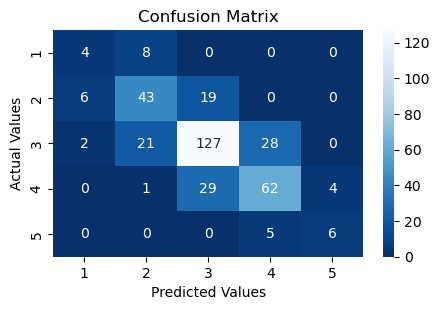


Classification Report:

              precision    recall  f1-score   support

           1       0.33      0.33      0.33        12
           2       0.59      0.63      0.61        68
           3       0.73      0.71      0.72       178
           4       0.65      0.65      0.65        96
           5       0.60      0.55      0.57        11

    accuracy                           0.66       365
   macro avg       0.58      0.57      0.58       365
weighted avg       0.66      0.66      0.66       365


For Fold 3 Accuracy is 0.6931506849315069


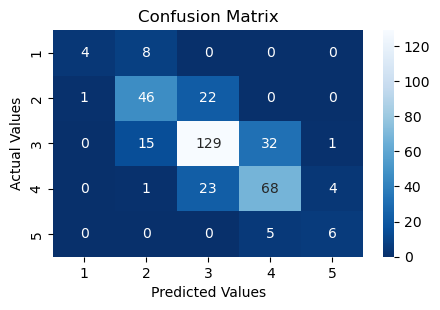


Classification Report:

              precision    recall  f1-score   support

           1       0.80      0.33      0.47        12
           2       0.66      0.67      0.66        69
           3       0.74      0.73      0.74       177
           4       0.65      0.71      0.68        96
           5       0.55      0.55      0.55        11

    accuracy                           0.69       365
   macro avg       0.68      0.60      0.62       365
weighted avg       0.70      0.69      0.69       365


For Fold 4 Accuracy is 0.6520547945205479


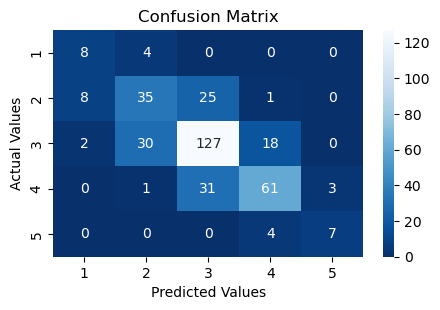


Classification Report:

              precision    recall  f1-score   support

           1       0.44      0.67      0.53        12
           2       0.50      0.51      0.50        69
           3       0.69      0.72      0.71       177
           4       0.73      0.64      0.68        96
           5       0.70      0.64      0.67        11

    accuracy                           0.65       365
   macro avg       0.61      0.63      0.62       365
weighted avg       0.66      0.65      0.65       365


For Fold 5 Accuracy is 0.6493150684931507


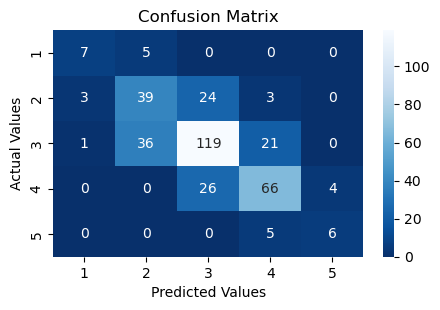


Classification Report:

              precision    recall  f1-score   support

           1       0.64      0.58      0.61        12
           2       0.49      0.57      0.52        69
           3       0.70      0.67      0.69       177
           4       0.69      0.69      0.69        96
           5       0.60      0.55      0.57        11

    accuracy                           0.65       365
   macro avg       0.62      0.61      0.62       365
weighted avg       0.66      0.65      0.65       365


For Fold 6 Accuracy is 0.6547945205479452


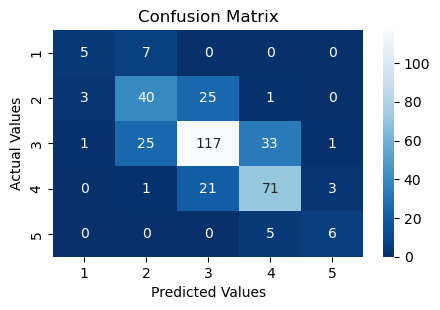


Classification Report:

              precision    recall  f1-score   support

           1       0.56      0.42      0.48        12
           2       0.55      0.58      0.56        69
           3       0.72      0.66      0.69       177
           4       0.65      0.74      0.69        96
           5       0.60      0.55      0.57        11

    accuracy                           0.65       365
   macro avg       0.61      0.59      0.60       365
weighted avg       0.66      0.65      0.65       365


For Fold 7 Accuracy is 0.6931506849315069


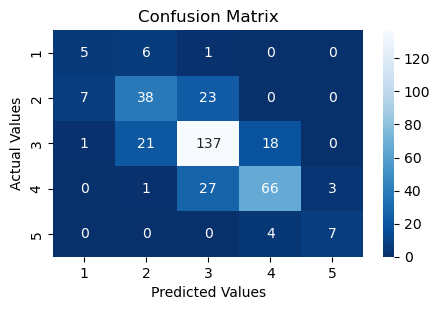


Classification Report:

              precision    recall  f1-score   support

           1       0.38      0.42      0.40        12
           2       0.58      0.56      0.57        68
           3       0.73      0.77      0.75       177
           4       0.75      0.68      0.71        97
           5       0.70      0.64      0.67        11

    accuracy                           0.69       365
   macro avg       0.63      0.61      0.62       365
weighted avg       0.69      0.69      0.69       365


For Fold 8 Accuracy is 0.6712328767123288


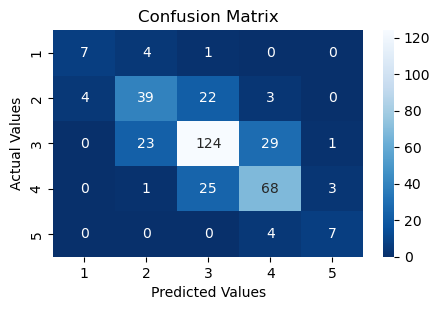


Classification Report:

              precision    recall  f1-score   support

           1       0.64      0.58      0.61        12
           2       0.58      0.57      0.58        68
           3       0.72      0.70      0.71       177
           4       0.65      0.70      0.68        97
           5       0.64      0.64      0.64        11

    accuracy                           0.67       365
   macro avg       0.65      0.64      0.64       365
weighted avg       0.67      0.67      0.67       365


For Fold 9 Accuracy is 0.6401098901098901


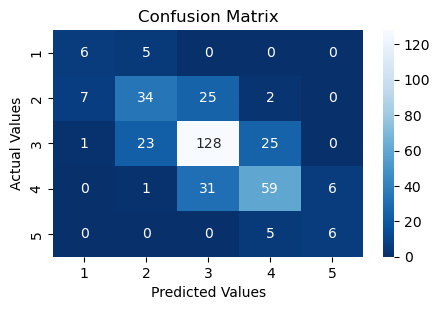


Classification Report:

              precision    recall  f1-score   support

           1       0.43      0.55      0.48        11
           2       0.54      0.50      0.52        68
           3       0.70      0.72      0.71       177
           4       0.65      0.61      0.63        97
           5       0.50      0.55      0.52        11

    accuracy                           0.64       364
   macro avg       0.56      0.58      0.57       364
weighted avg       0.64      0.64      0.64       364


For Fold 10 Accuracy is 0.6978021978021978


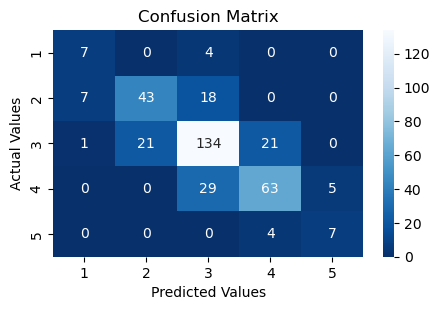


Classification Report:

              precision    recall  f1-score   support

           1       0.47      0.64      0.54        11
           2       0.67      0.63      0.65        68
           3       0.72      0.76      0.74       177
           4       0.72      0.65      0.68        97
           5       0.58      0.64      0.61        11

    accuracy                           0.70       364
   macro avg       0.63      0.66      0.64       364
weighted avg       0.70      0.70      0.70       364


Average Cross-Validation Accuracy: 0.6689

Average Cross-Validation Precision: 0.6718

Average Cross-Validation Recall: 0.6689

Average Cross-Validation F1-Score: 0.6691


In [223]:
# Created a for loop to call the 'train_model' function for each split.
fold_no=1
for train,test in sKFold.split(dataset,y):
    train_index = dataset.iloc[train,:]
    test_index = dataset.iloc[test,:]
    train_model(train_index, test_index, fold_no)
    fold_no += 1

# Calculate mean scores
mean_ac = round(np.mean(accuracy_scores), 4)
mean_pre = round(np.mean(precision_scores), 4)
mean_rec = round(np.mean(recall_scores), 4)
mean_f1 = round(np.mean(f1_scores), 4)

print('\nAverage Cross-Validation Accuracy:', mean_ac)
print('\nAverage Cross-Validation Precision:', mean_pre)
print('\nAverage Cross-Validation Recall:', mean_rec)
print('\nAverage Cross-Validation F1-Score:', mean_f1)

### Decision Tree Performance Metrics

In [224]:
compare.iat[2,1] = mean_ac
compare.iat[2,2] = mean_pre
compare.iat[2,3] = mean_rec
compare.iat[2,4] = mean_f1
compare

,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,Logistic Regression (with OVR),0.7933,0.8092,0.7933,0.7806
1,Random Forest,0.7892,0.7995,0.7892,0.7787
2,Decision Tree,0.6689,0.6718,0.6689,0.6691
3,Linear Support Vector Classification,NaN,NaN,NaN,NaN
4,Final Model,NaN,NaN,NaN,NaN


## Linear Support Vector Classification

In [225]:
# Import the required library
from sklearn.svm import LinearSVC

In [226]:
# Create an instance of Pipeline
pipeline = make_pipeline(StandardScaler(), LinearSVC(multi_class='ovr', random_state=1))

In [227]:
# To store the respective scores of every fold
accuracy_scores = [] 
precision_scores = []
recall_scores = []
f1_scores = []


For Fold 1 Accuracy is 0.7452054794520548


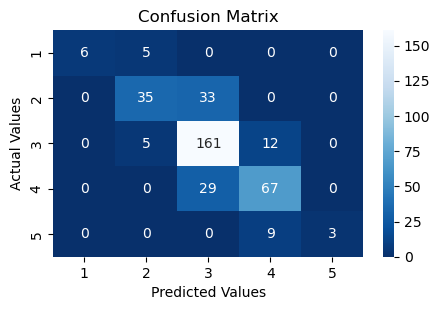


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.55      0.71        11
           2       0.78      0.51      0.62        68
           3       0.72      0.90      0.80       178
           4       0.76      0.70      0.73        96
           5       1.00      0.25      0.40        12

    accuracy                           0.75       365
   macro avg       0.85      0.58      0.65       365
weighted avg       0.76      0.75      0.73       365


For Fold 2 Accuracy is 0.8027397260273973


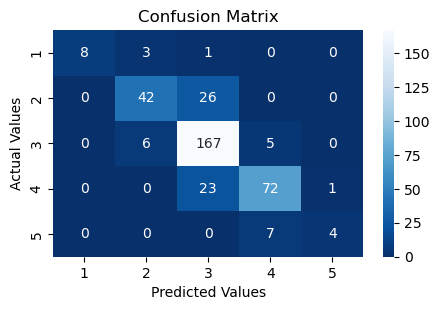


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.67      0.80        12
           2       0.82      0.62      0.71        68
           3       0.77      0.94      0.85       178
           4       0.86      0.75      0.80        96
           5       0.80      0.36      0.50        11

    accuracy                           0.80       365
   macro avg       0.85      0.67      0.73       365
weighted avg       0.81      0.80      0.80       365


For Fold 3 Accuracy is 0.7835616438356164


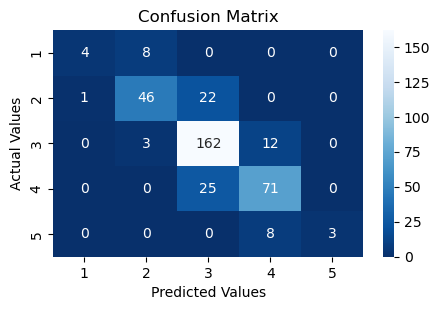


Classification Report:

              precision    recall  f1-score   support

           1       0.80      0.33      0.47        12
           2       0.81      0.67      0.73        69
           3       0.78      0.92      0.84       177
           4       0.78      0.74      0.76        96
           5       1.00      0.27      0.43        11

    accuracy                           0.78       365
   macro avg       0.83      0.59      0.65       365
weighted avg       0.79      0.78      0.77       365


For Fold 4 Accuracy is 0.7835616438356164


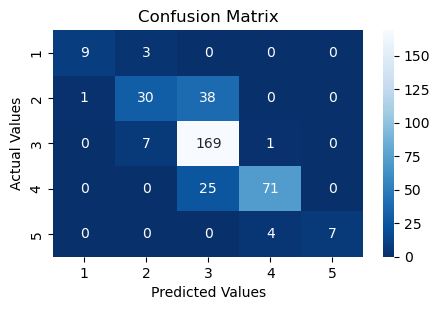


Classification Report:

              precision    recall  f1-score   support

           1       0.90      0.75      0.82        12
           2       0.75      0.43      0.55        69
           3       0.73      0.95      0.83       177
           4       0.93      0.74      0.83        96
           5       1.00      0.64      0.78        11

    accuracy                           0.78       365
   macro avg       0.86      0.70      0.76       365
weighted avg       0.80      0.78      0.77       365


For Fold 5 Accuracy is 0.7753424657534247


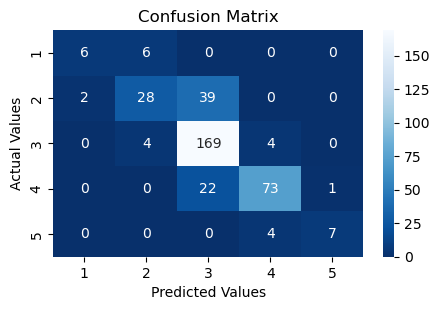


Classification Report:

              precision    recall  f1-score   support

           1       0.75      0.50      0.60        12
           2       0.74      0.41      0.52        69
           3       0.73      0.95      0.83       177
           4       0.90      0.76      0.82        96
           5       0.88      0.64      0.74        11

    accuracy                           0.78       365
   macro avg       0.80      0.65      0.70       365
weighted avg       0.78      0.78      0.76       365


For Fold 6 Accuracy is 0.7479452054794521


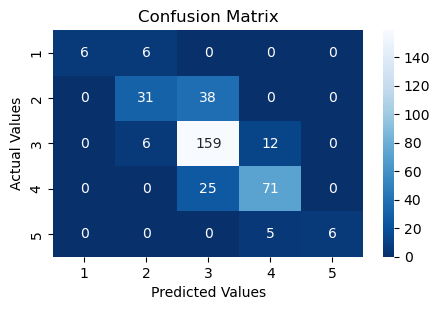


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.50      0.67        12
           2       0.72      0.45      0.55        69
           3       0.72      0.90      0.80       177
           4       0.81      0.74      0.77        96
           5       1.00      0.55      0.71        11

    accuracy                           0.75       365
   macro avg       0.85      0.63      0.70       365
weighted avg       0.76      0.75      0.74       365


For Fold 7 Accuracy is 0.7534246575342466


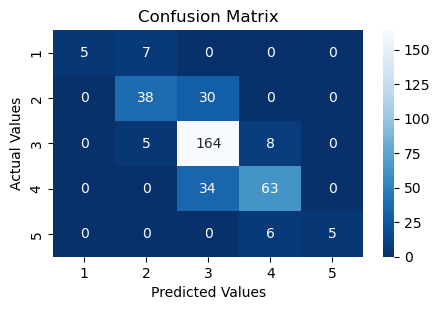


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.42      0.59        12
           2       0.76      0.56      0.64        68
           3       0.72      0.93      0.81       177
           4       0.82      0.65      0.72        97
           5       1.00      0.45      0.62        11

    accuracy                           0.75       365
   macro avg       0.86      0.60      0.68       365
weighted avg       0.77      0.75      0.74       365


For Fold 8 Accuracy is 0.7424657534246575


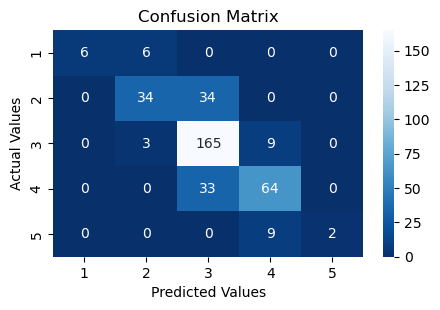


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.50      0.67        12
           2       0.79      0.50      0.61        68
           3       0.71      0.93      0.81       177
           4       0.78      0.66      0.72        97
           5       1.00      0.18      0.31        11

    accuracy                           0.74       365
   macro avg       0.86      0.55      0.62       365
weighted avg       0.76      0.74      0.73       365


For Fold 9 Accuracy is 0.7637362637362637


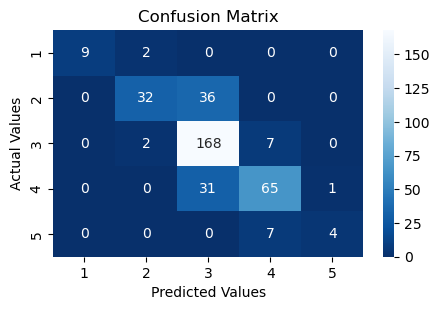


Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.89      0.47      0.62        68
           3       0.71      0.95      0.82       177
           4       0.82      0.67      0.74        97
           5       0.80      0.36      0.50        11

    accuracy                           0.76       364
   macro avg       0.85      0.65      0.71       364
weighted avg       0.79      0.76      0.75       364


For Fold 10 Accuracy is 0.7967032967032966


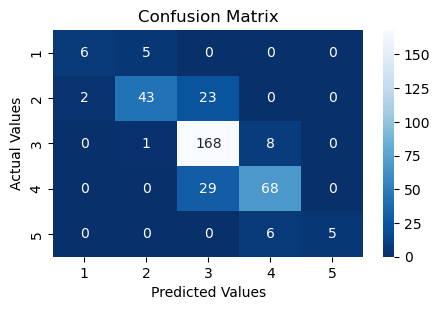


Classification Report:

              precision    recall  f1-score   support

           1       0.75      0.55      0.63        11
           2       0.88      0.63      0.74        68
           3       0.76      0.95      0.85       177
           4       0.83      0.70      0.76        97
           5       1.00      0.45      0.62        11

    accuracy                           0.80       364
   macro avg       0.84      0.66      0.72       364
weighted avg       0.81      0.80      0.79       364


Average Cross-Validation Accuracy: 0.7695

Average Cross-Validation Precision: 0.7834

Average Cross-Validation Recall: 0.7695

Average Cross-Validation F1-Score: 0.7582


In [228]:
# Created a for loop to call the 'train_model' function for each split.
fold_no=1
for train,test in sKFold.split(dataset,y):
    train_index = dataset.iloc[train,:]
    test_index = dataset.iloc[test,:]
    train_model(train_index, test_index, fold_no)
    fold_no += 1

# Calculate mean scores
mean_ac = round(np.mean(accuracy_scores), 4)
mean_pre = round(np.mean(precision_scores), 4)
mean_rec = round(np.mean(recall_scores), 4)
mean_f1 = round(np.mean(f1_scores), 4)

print('\nAverage Cross-Validation Accuracy:', mean_ac)
print('\nAverage Cross-Validation Precision:', mean_pre)
print('\nAverage Cross-Validation Recall:', mean_rec)
print('\nAverage Cross-Validation F1-Score:', mean_f1)


### Linear Support Vector Classification Performance Metrics

In [229]:
compare.iat[3,1] = mean_ac
compare.iat[3,2] = mean_pre
compare.iat[3,3] = mean_rec
compare.iat[3,4] = mean_f1
compare

,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,Logistic Regression (with OVR),0.7933,0.8092,0.7933,0.7806
1,Random Forest,0.7892,0.7995,0.7892,0.7787
2,Decision Tree,0.6689,0.6718,0.6689,0.6691
3,Linear Support Vector Classification,0.7695,0.7834,0.7695,0.7582
4,Final Model,NaN,NaN,NaN,NaN


## Model Evaluation

In [230]:
compare

,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,Logistic Regression (with OVR),0.7933,0.8092,0.7933,0.7806
1,Random Forest,0.7892,0.7995,0.7892,0.7787
2,Decision Tree,0.6689,0.6718,0.6689,0.6691
3,Linear Support Vector Classification,0.7695,0.7834,0.7695,0.7582
4,Final Model,NaN,NaN,NaN,NaN


* **As we have a high class imbalance, we will choose the F1-score for model evaluation along with accuracy because a high F1-score considers both precision and recall. For a high F1, both false positives and false negatives must be low.**<br></br>
* **False Positive (FP): It is the number of predictions the classifier incorrectly predicts the negative class as positive.**<br></br>
* **False Negative (FN): It is the number of predictions the classifier incorrectly predicts the positive class as negative.**<br></br>
* **Thus the Logistic Regression model has the highest accuracy as well as F1-score compared to other classifiers.**<br></br>
* **Let's tune the hyperparameters to improve the Logistic Regression Model performance.**
<br></br>

## Hyperparameter Tuning
**Let us tune the hyperparameters and improve the Logistic Regression Model performance.**

In [231]:
# Import the required libraries
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split

In [232]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10, stratify=y)

In [233]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [234]:
X_train = scaler.fit_transform(X_train) # Scaling Train Data
# Calculating the dimensions of train set
X_train.shape

(2553, 41)

In [235]:
X_test = scaler.transform(X_test) # Scaling Test Data
# Calculating the dimensions of test set
X_test.shape

(1095, 41)

In [236]:
log_reg = LogisticRegression(multi_class= 'ovr', random_state=10)

In [237]:
# Storing a set of hyperparameters to be tuned in the param dictionary
param = {'penalty': ['l1', 'l2'], 
         'solver': ['newton-cg', 'liblinear'],
         'n_jobs' : [-1],
         'class_weight' : ['balanced', 'None'],
         'C': [1, 10, 100]}

In [238]:
scoring = ['accuracy','f1_weighted']

In [239]:
grid_search = GridSearchCV(estimator = log_reg, 
                           param_grid = param, 
                           cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                           scoring = scoring,
                           refit = 'f1_weighted')

In [240]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=LogisticRegression(multi_class='ovr', random_state=10),
             param_grid={'C': [1, 10, 100],
                         'class_weight': ['balanced', 'None'], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear']},
             refit='f1_weighted', scoring=['accuracy', 'f1_weighted'])

In [241]:
lr_score=grid_search.best_score_
print("Best cross-validation score:",lr_score)

Best cross-validation score: 0.8438257022284201


In [242]:
print("Best parameters:\n")
grid_search.best_params_

Best parameters:



{'C': 100,
 'class_weight': 'balanced',
 'n_jobs': -1,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [243]:
lr_best = grid_search.best_estimator_
print("Best Estimator:\n")
lr_best

Best Estimator:



LogisticRegression(C=100, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   random_state=10, solver='newton-cg')

In [244]:
final_model = LogisticRegression(C=100, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   random_state=10, solver='newton-cg')

In [245]:
#fitting the model
final_model.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced', multi_class='ovr', n_jobs=-1,
                   random_state=10, solver='newton-cg')

In [246]:
# Making predictions on test and train set
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

In [247]:
# Calculating Evaluation Metrics Scores
lr_ac = round(accuracy_score(y_test, y_test_pred), 4)
lr_pre = round(precision_score(y_test, y_test_pred, average='weighted'), 4)
lr_rec = round(recall_score(y_test, y_test_pred, average='weighted'), 4)
lr_f1 = round(f1_score(y_test, y_test_pred, average='weighted'), 4)

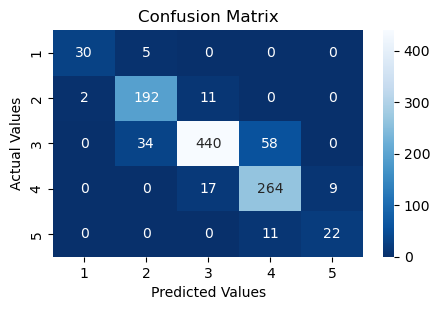

              precision    recall  f1-score   support

           1       0.94      0.86      0.90        35
           2       0.83      0.94      0.88       205
           3       0.94      0.83      0.88       532
           4       0.79      0.91      0.85       290
           5       0.71      0.67      0.69        33

    accuracy                           0.87      1095
   macro avg       0.84      0.84      0.84      1095
weighted avg       0.87      0.87      0.87      1095


Accuracy: 0.8658

Weighted Average Precision: 0.8737

Weighted Average Recall: 0.8658

Weighted Average F1-Score: 0.8662


In [248]:
# Creating  a confusion matrix to compares the y_test and y_pred
conf_m = confusion_matrix(y_test, y_test_pred)
    
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
df_conf_m = pd.DataFrame(conf_m, index = [1,2,3,4,5], columns = [1,2,3,4,5])
    
#Plotting the confusion matrix
plt.figure(figsize=(5,3),dpi=100)
sns.heatmap(df_conf_m, cmap = "Blues_r", annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Printing all the scores
print(classification_report(y_test, y_test_pred))

# Print the metric scores
print('\nAccuracy:', lr_ac)
print('\nWeighted Average Precision:', lr_pre)
print('\nWeighted Average Recall:', lr_rec)
print('\nWeighted Average F1-Score:', lr_f1)

In [249]:
compare.iat[4,0] = 'Logistic Regression Hyperparameter Tuning'
compare.iat[4,1] = lr_ac
compare.iat[4,2] = lr_pre
compare.iat[4,3] = lr_rec
compare.iat[4,4] = lr_f1
compare

,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,Logistic Regression (with OVR),0.7933,0.8092,0.7933,0.7806
1,Random Forest,0.7892,0.7995,0.7892,0.7787
2,Decision Tree,0.6689,0.6718,0.6689,0.6691
3,Linear Support Vector Classification,0.7695,0.7834,0.7695,0.7582
4,Logistic Regression Hyperparameter Tuning,0.8658,0.8737,0.8658,0.8662


**INFERENCES:**
* **The Accuracy, Precision, Recall and F1-Score has increased after tuning the hyperparameters of the Logistic Regression model (with OVR).**<br></br>
* **Accuracy is 0.87**<br></br>
* **Precision (Weighted Avg) is 0.87**<br></br>
* **Recall (Weighted Avg) is 0.87**<br></br>
* **F1-Score (Weighted Avg) is 0.87**<br></br>
* **The above scores are decent. Hence, finalizing this model to predict the Hospital overall rating.**<br></br>

In [250]:
# see y_test_pred
y_test_pred[:10]

array([3, 4, 2, 4, 3, 4, 2, 5, 3, 4])

In [251]:
# Converting y_test_pred to a dataframe
y_test_pred = pd.DataFrame(y_test_pred)

In [252]:
# Let's see the head
y_test_pred.head()

,0
0,3
1,4
2,2
3,4
4,3


In [253]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [254]:
# Remove index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [255]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [256]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Predicted Rating'})

In [257]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Hospital overall rating,Predicted Rating
0,3,3
1,3,4
2,2,2
3,4,4
4,3,3


In [258]:
y_pred_final.tail()

,Hospital overall rating,Predicted Rating
1090,3,2
1091,4,4
1092,3,3
1093,3,3
1094,4,4


## Provider Analysis

In [259]:
# Finding the feature importance of all the features (i.e. Measure IDs) provided to the model
feature_imp=pd.DataFrame({'Feature':list(X.columns),'Feature Importance':[i for i in final_model.coef_[0]]})
feature_imp=feature_imp.sort_values('Feature Importance',ascending=False)
feature_imp

,Feature,Feature Importance
1,PSI_90_SAFETY,22.769805
24,READM_30_HOSP_WIDE,18.234475
19,MORT_30_PN,12.928601
27,ED_1b,8.318886
21,READM_30_COPD,6.578388
17,MORT_30_COPD,5.760814
20,MORT_30_STK,5.759669
36,STK_1,4.990340
18,MORT_30_HF,3.974258
26,READM_30_STK,3.640661


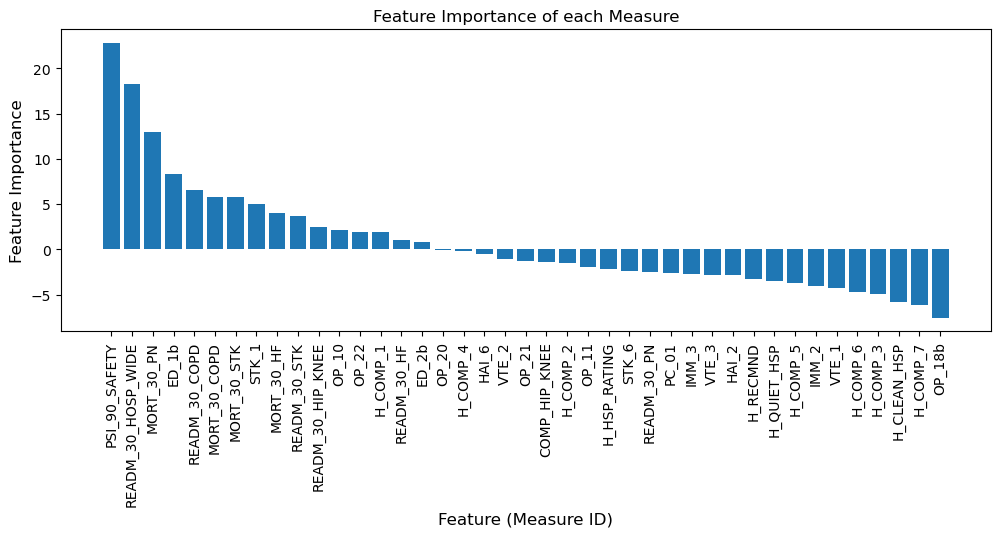

In [260]:
# Plotting a bar graph for Feature Importance of all Measure IDs

plt.figure(figsize=(12,4),dpi=100)
plt.bar(x=feature_imp['Feature'], height=feature_imp['Feature Importance'])
plt.title('Feature Importance of each Measure', size=12)
plt.xticks(fontsize=10, rotation='vertical')
plt.yticks(fontsize=10)
plt.xlabel('Feature (Measure ID)',fontsize=12)
plt.ylabel('Feature Importance',fontsize=12)
plt.show()

### Analysis for Evanston Hospital

In [261]:
# In the 'Evanston' dataframe, storing only the Evanston Hospital related data from final_data 
Evanston = final_data.loc[final_data['Provider ID'] == 140010]
Evanston.head()

,Provider ID,Hospital Name,Hospital Type,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
1124,140010,EVANSTON HOSPITAL,Acute Care Hospitals,3,Above the National average,Below the National average,Above the National average,Below the National average,Above the National average,Same as the National average,Above the National average,0.558907,3.0,0.14766,-0.632267,-0.201327,-0.284223,-0.180509,-1.240653,-0.373408,-0.675235,0.551288,0.008668,0.885878,0.059526,0.306632,-0.240736,-0.152615,-2.176896,-1.840738,-1.600837,-1.680969,-0.232197,-0.505601,-1.917074,-0.431086,-0.36467,0.278177,-0.375636,-0.431319,0.322402,-2.61314,0.543667,1.503564,0.535113,-0.410587,-0.547,0.134807,0.560765,0.403537,0.551124,0.708316


In [262]:
# Let's see what rating the final_model predicts for the 'Evanston Hospital (Provider ID - 140010) with the current available data
Evanston_data = Evanston.drop(['Provider ID', 'Hospital Name', 'Hospital Type', 'Hospital overall rating',
                              'Mortality national comparison','Safety of care national comparison',
              'Readmission national comparison','Patient experience national comparison',
              'Effectiveness of care national comparison','Timeliness of care national comparison',
              'Efficient use of medical imaging national comparison'], axis=1)
Evanston_pred = final_model.predict(Evanston_data)
Evanston_pred

array([3])

**INFERENCE: For Evanston Hospital, the final model has correctly predicted the Hospital overall rating i.e. 3**<br></br>

In [263]:
# In Hosp_four, let's store the hospital related data of all the hospitals from 'final_data' dataframe having rating 4
Hosp_four = final_data.loc[final_data['Hospital overall rating'] == 4]
Hosp_four.head(2)

,Provider ID,Hospital Name,Hospital Type,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
10,10021,DALE MEDICAL CENTER,Acute Care Hospitals,4,Same as the National average,Same as the National average,Same as the National average,Above the National average,Above the National average,Above the National average,Same as the National average,1.809634,0.750237,0.147660,0.495059,1.8026,0.740328,1.118301,-1.240653,-0.373408,0.353265,0.551288,1.925193,0.885878,-1.158889,-1.219218,-0.465612,-0.283648,-1.536777,0.045207,-0.984484,1.126803,-0.072119,-0.438086,1.039645,-0.886385,-0.500827,-0.052589,-1.160514,-0.789283,0.660466,0.790775,-1.275156,-0.416561,-0.564382,0.171770,-0.26912,0.466641,0.263278,0.610598,0.551124,0.270484
14,10029,EAST ALABAMA MEDICAL CENTER,Acute Care Hospitals,4,Same as the National average,Above the National average,Above the National average,Above the National average,Same as the National average,Above the National average,Same as the National average,0.767362,-1.649414,-0.900325,0.495059,1.8026,-0.284223,-0.180509,1.085093,0.792852,0.353265,0.551288,1.925193,0.885878,-0.351391,-0.395174,0.326808,-0.321086,-0.073648,-0.024643,1.149048,-0.347277,-0.632392,0.844692,2.729199,-0.431086,-0.909296,-0.493611,-0.539153,-0.691657,-0.353725,0.861690,-0.105913,1.040086,1.390275,0.754127,-0.54700,-0.362943,0.114534,-0.631770,-0.056033,0.562372


In [264]:
# Creating an empty dataframe with only measure IDs as column names. 
# This dataframe is to store the median value of each column of Hosp_four dataframe
hosp_four_median = pd.DataFrame(columns=measure_cols,index = ['Median Value'])

In [265]:
# To update hosp_four_median with the Hosp_four dataframe respective column median value
for m in measure_cols:
    hosp_four_median[m]=Hosp_four[m].median()
    
hosp_four_median

Measure ID,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
Median Value,-0.066456,-0.234236,0.14766,0.495059,0.800637,0.740328,1.118301,1.085093,0.792852,0.353265,0.551288,0.008668,0.885878,-0.125625,-0.048486,-0.304986,-0.358524,-0.165093,-0.094493,-0.36813,-0.0665,-0.232197,-0.438086,-0.016326,-0.544911,-0.432748,-0.052589,-0.299329,-0.30115,0.322402,0.436201,-0.183862,-0.217927,-0.136801,-0.410587,-0.26912,0.300724,0.263278,0.300006,0.348738,0.270484


In [266]:
Evanston.head()

,Provider ID,Hospital Name,Hospital Type,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
1124,140010,EVANSTON HOSPITAL,Acute Care Hospitals,3,Above the National average,Below the National average,Above the National average,Below the National average,Above the National average,Same as the National average,Above the National average,0.558907,3.0,0.14766,-0.632267,-0.201327,-0.284223,-0.180509,-1.240653,-0.373408,-0.675235,0.551288,0.008668,0.885878,0.059526,0.306632,-0.240736,-0.152615,-2.176896,-1.840738,-1.600837,-1.680969,-0.232197,-0.505601,-1.917074,-0.431086,-0.36467,0.278177,-0.375636,-0.431319,0.322402,-2.61314,0.543667,1.503564,0.535113,-0.410587,-0.547,0.134807,0.560765,0.403537,0.551124,0.708316


In [267]:
# Let's create a new dataframe with current Evanston data to update it later with some of the improved values
Evanston_improved = Evanston
Evanston_improved

,Provider ID,Hospital Name,Hospital Type,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
1124,140010,EVANSTON HOSPITAL,Acute Care Hospitals,3,Above the National average,Below the National average,Above the National average,Below the National average,Above the National average,Same as the National average,Above the National average,0.558907,3.0,0.14766,-0.632267,-0.201327,-0.284223,-0.180509,-1.240653,-0.373408,-0.675235,0.551288,0.008668,0.885878,0.059526,0.306632,-0.240736,-0.152615,-2.176896,-1.840738,-1.600837,-1.680969,-0.232197,-0.505601,-1.917074,-0.431086,-0.36467,0.278177,-0.375636,-0.431319,0.322402,-2.61314,0.543667,1.503564,0.535113,-0.410587,-0.547,0.134807,0.560765,0.403537,0.551124,0.708316


In [268]:
# Let's update some column values with improved values
Evanston_improved.loc[1124,['PSI_90_SAFETY','MORT_30_PN','MORT_30_COPD','MORT_30_STK','MORT_30_HF',
                         'OP_18b','H_COMP_7','H_COMP_3','H_COMP_6','H_COMP_5']] = [-0.234236,-0.36813,-0.165093,-0.0665,-0.183862,0.353265,0.740328,0.792852,1.085093,-0.094493]
Evanston_improved

,Provider ID,Hospital Name,Hospital Type,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,COMP_HIP_KNEE,PSI_90_SAFETY,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_2,HAI_6,OP_10,OP_11,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,PC_01,STK_1,STK_6,VTE_1,VTE_2,VTE_3
1124,140010,EVANSTON HOSPITAL,Acute Care Hospitals,3,Above the National average,Below the National average,Above the National average,Below the National average,Above the National average,Same as the National average,Above the National average,0.558907,-0.234236,0.14766,-0.632267,-0.201327,0.792852,-0.180509,-0.094493,1.085093,0.740328,0.551288,0.008668,0.885878,0.059526,0.306632,-0.240736,-0.152615,-0.165093,-0.183862,-0.36813,-0.0665,-0.232197,-0.505601,-1.917074,-0.431086,-0.36467,0.278177,-0.375636,-0.431319,0.322402,-2.61314,0.353265,1.503564,0.535113,-0.410587,-0.547,0.134807,0.560765,0.403537,0.551124,0.708316


In [269]:
# Let's see what rating the final_model predicts for the 'Evanston Hospital (Provider ID - 140010) with the improved data
Evanston_improved = Evanston_improved.drop(['Provider ID', 'Hospital Name', 'Hospital Type', 'Hospital overall rating',
                              'Mortality national comparison','Safety of care national comparison',
              'Readmission national comparison','Patient experience national comparison',
              'Effectiveness of care national comparison','Timeliness of care national comparison',
              'Efficient use of medical imaging national comparison'], axis=1)
Evanston_new_pred = final_model.predict(Evanston_improved)
Evanston_new_pred

array([4])

**INFERENCE: For Evanston Hospital with the improved data, the model has predicted the Hospital overall rating as 4!**<br></br>

**The following Measure IDs were updated for Evanston Hospital:**
* **PSI_90_SAFETY -> 3 to -0.234236**
* **MORT_30_PN -> -1.600837 to -0.36813**
* **MORT_30_COPD -> -2.176896 to -0.165093**
* **MORT_30_STK -> -1.680969 to -0.0665**
* **MORT_30_HF -> -1.840738 to -0.183862**
* **OP_18b -> 0.543667 to 0.353265**
* **H_COMP_7 -> -0.675235 to 0.740328**
* **H_COMP_3 -> -0.284223 to 0.792852**
* **H_COMP_6 -> -0.373408 to 1.085093**
* **H_COMP_5 -> -1.240653 to -0.094493**

## Recommendations and Business Impact

**1. Advantages of the built final Logistic Regression Model are**
* **It can help to compare the hospital data of various hospitals and identify the features that need improvement.**
* **It can also be used to see the feature areas which the hospitals are performing good and maintain the same.**

**2. The Feature Importance gave us the importance of each feature in the prediction of rating for the hospitals.** 

**3. If Evanston Hospital improves the below few measures, it can increase it's rating from 3 to at least 4.**
* **PSI_90_SAFETY -> Serious complications measure PSI_90 is composed of 11 other measures. This score tells how often patient had certain serious complications related to medical or surgical inpatient hospital care. This needs to be low but is currently very high for Evanston Hospital. Hospital needs to level up inpatient hospital care and see to it that patients do not get serious complications.**<br></br>
* **MORT_30_PN -> Death rate for pneumonia patients, this needs to be as low as possible. Currently it is 1.600837 (after direction reversed) and should be lowered to atleast 0.36813. Pneumonia patients need to be handled with extra care.**<br></br>
* **MORT_30_COPD -> Death rate for chronic obstructive pulmonary disease (COPD) patients. Currently it is 2.176896 (after direction reversed) and should be lowered to atleast 0.165093. COPD patients need to be handled with extra care.**<br></br>
* **MORT_30_STK -> Death rate for stroke patients. Currently it is 1.680969 (after direction reversed) and should be lowered to atleast 0.0665. STK patients need to be handled with extra care.**<br></br>
* **MORT_30_HF -> Death rate for heart failure patients. Currently it is 1.840738 (after direction reversed) and should be lowered to atleast 0.183862. Patients with the risk of heart failure need to be prioritized.**<br></br> 
* **OP_18b -> Average (median) time patients spent in the emergency department before leaving from the visit. This need to be low. Emergency department needs to increase its services.**<br></br>
* **H_COMP_7 -> Care Transition. This needs to be high. The hopital needs to make sure patients understood their care when they leave the hospital.**<br></br> 
* **H_COMP_3 -> Staff responsiveness. This needs to be high. The hospital needs to make sure patients receive help as soon as they want it. Hospitals should train the staff accordingly.**<br></br>
* **H_COMP_6 -> Discharge Information. This needs to be high. The hospital needs to make sure patients receive information about what to do during their recovery at home. Hospitals should train and keep some resources specifically to do this task.**<br></br>
* **H_COMP_5 -> Communication about medicine. This needs to be high. The hospital needs to make sure staff explain about the medicines to the patients before giving it to them. Hospitals should inform this to the appropriate staff resources.**<br></br> 

**4. Following are the groups that need attention from Evanston Hospital's management:**
* **Safety of Care**
* **Mortality**
* **Patient Experience**
* **Timeliness of Care**

**5. Thus, this Logistic Regression model would be helpful for the Evanston hospital to improve their services accordingly for the next year.**